# Exploring Factors Influencing Mood Swings in Women: A Comprehensive Analysis

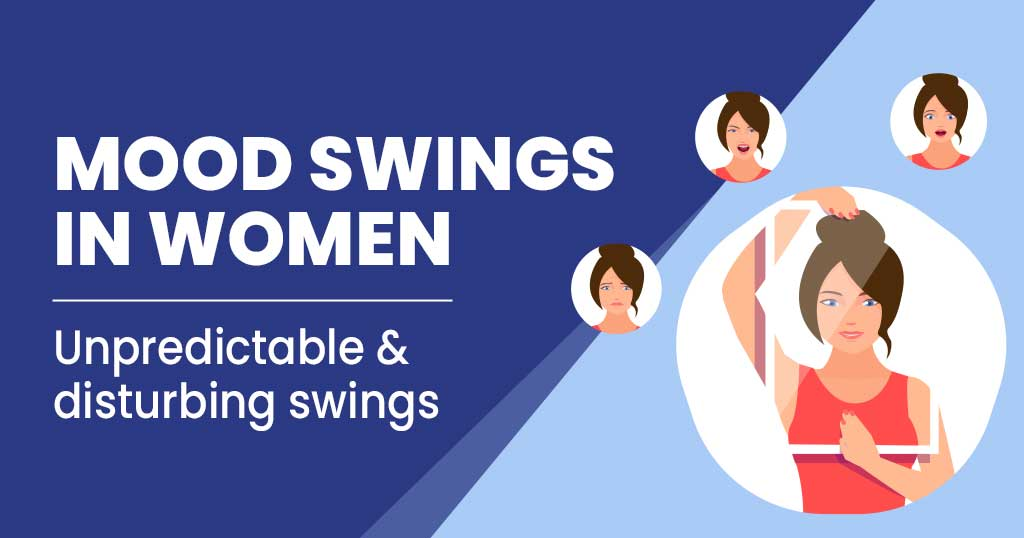

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

In [2]:
from scipy.stats import chi2_contingency
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

In [3]:
import warnings
warnings.filterwarnings('ignore')
print("Kindly ignore.......")

Kindly ignore.......


In [4]:
df = pd.read_csv('women_mood_swings_dataset.csv')

In [5]:
df.head()

Participant_ID  Age Relationship_Role  Relationship_Duration  Mood_Level  \
0          P0001   26              Wife                   12.3           9   
1          P0002   29              Wife                    2.2           6   
2          P0003   37        Girlfriend                   11.3           5   
3          P0004   23              Wife                   21.3           3   
4          P0005   19        Girlfriend                    1.9           2   

  Time_of_Day Menstrual_Phase PMS_Symptoms  Sleep_Quality  Sleep_Duration  \
0     Morning       Ovulation          Yes              2             9.4   
1     Evening      Follicular          Yes              5             5.2   
2       Night       Menstrual          Yes              7             5.3   
3   Afternoon       Ovulation           No              7             5.2   
4   Afternoon      Follicular          Yes              7             4.1   

   ... Mental_Health_Status  Health_Conditions Use_of_Therapy  Weather  \
0  ...                    2                NaN             No   Cloudy   
1  ...                    5               PCOS             No   Stormy   
2  ...                    7            Thyroid             No    Snowy   
3  ...                    1                NaN             No   Stormy   
4  ...                    1               PCOS            Yes    Sunny   

   Temperature  Perceived_Financial_Stress Partner_Presence  \
0         29.6                           5               No   
1         15.0                           6               No   
2         17.7                           7              Yes   
3         19.6                           7               No   
4         18.7                           5               No   

   Positive_Interaction_Frequency  Weekly_Self_Care_Activities  \
0                               3                            1   
1                              10                            2   
2                               9                            4   
3                               0                            3   
4                               1                            4   

   Mood_Tracking_App_Usage  
0                       No  
1                       No  
2                      Yes  
3                       No  
4                       No  

[5 rows x 32 columns]

In [6]:
df.tail()

Participant_ID  Age Relationship_Role  Relationship_Duration  Mood_Level  \
4995          P4996   33        Girlfriend                   16.6           6   
4996          P4997   37              Wife                   16.8          10   
4997          P4998   46        Girlfriend                   11.9           4   
4998          P4999   20        Girlfriend                    8.8           2   
4999          P5000   40              Wife                    9.5           8   

     Time_of_Day Menstrual_Phase PMS_Symptoms  Sleep_Quality  Sleep_Duration  \
4995     Evening       Ovulation           No              7             5.1   
4996     Evening       Menstrual           No              6             6.8   
4997   Afternoon       Menstrual          Yes              8             9.3   
4998       Night       Ovulation          Yes              4             7.9   
4999     Evening       Ovulation          Yes              6             8.9   

      ... Mental_Health_Status  Health_Conditions Use_of_Therapy  Weather  \
4995  ...                    1            Thyroid             No   Stormy   
4996  ...                    1            Thyroid             No    Snowy   
4997  ...                    3                NaN             No    Sunny   
4998  ...                    7               PCOS            Yes    Rainy   
4999  ...                    8                NaN            Yes   Cloudy   

      Temperature  Perceived_Financial_Stress Partner_Presence  \
4995         15.1                           8              Yes   
4996         29.4                           7              Yes   
4997         23.8                           2               No   
4998         25.6                           6               No   
4999         33.2                           3              Yes   

      Positive_Interaction_Frequency  Weekly_Self_Care_Activities  \
4995                               8                            5   
4996                               3                            1   
4997                               9                            0   
4998                               1                            3   
4999                               6                            5   

      Mood_Tracking_App_Usage  
4995                       No  
4996                      Yes  
4997                       No  
4998                       No  
4999                      Yes  

[5 rows x 32 columns]

In [7]:
df.shape

(5000, 32)

In [8]:
df.columns

Index(['Participant_ID', 'Age', 'Relationship_Role', 'Relationship_Duration',
       'Mood_Level', 'Time_of_Day', 'Menstrual_Phase', 'PMS_Symptoms',
       'Sleep_Quality', 'Sleep_Duration', 'Recent_Activity', 'Stress_Level',
       'Recent_Argument', 'Conflict_Intensity', 'Partner_Support_Level',
       'Self_Esteem_Level', 'Physical_Activity_Level',
       'Social_Interaction_Level', 'Diet_Quality', 'Caffeine_Intake',
       'Alcohol_Intake', 'Hormonal_Birth_Control', 'Mental_Health_Status',
       'Health_Conditions', 'Use_of_Therapy', 'Weather', 'Temperature',
       'Perceived_Financial_Stress', 'Partner_Presence',
       'Positive_Interaction_Frequency', 'Weekly_Self_Care_Activities',
       'Mood_Tracking_App_Usage'],
      dtype='object')


#  Dataset Structure for Women (Wife/Girlfriend) Mood Swings

| **Feature**                    | **Description**                                                                                      | **Type**       |
|--------------------------------|------------------------------------------------------------------------------------------------------|----------------|
| `Participant_ID`               | Unique identifier for each participant (anonymized)                                                  | Categorical    |
| `Age`                          | Age of the participant (in years)                                                                    | Numerical      |
| `Relationship_Role`            | Specifies whether the participant is a wife or girlfriend                                            | Categorical    |
| `Relationship_Duration`        | Length of the relationship (in years)                                                                | Numerical      |
| `Mood_Level`                   | Self-reported mood level (scale of 1-10, where 1 is very negative and 10 is very positive)            | Numerical      |
| `Time_of_Day`                  | Time of the day when the mood was reported (Morning, Afternoon, Evening, Night)                      | Categorical    |
| `Menstrual_Phase`              | Current phase of the menstrual cycle (e.g., Menstrual, Follicular, Luteal, Ovulation)                 | Categorical    |
| `PMS_Symptoms`                 | Presence of premenstrual syndrome symptoms (Yes/No)                                                  | Categorical    |
| `Sleep_Quality`                | Self-reported sleep quality (scale of 1-10)                                                          | Numerical      |
| `Sleep_Duration`               | Hours of sleep the night before                                                                      | Numerical      |
| `Recent_Activity`              | Recent activity before reporting mood (e.g., Exercising, Socializing, Working, Resting)              | Categorical    |
| `Stress_Level`                 | Self-reported stress level (scale of 1-10)                                                           | Numerical      |
| `Recent_Argument`              | Whether there was a recent argument or conflict with partner (Yes/No)                                | Categorical    |
| `Conflict_Intensity`           | Intensity of recent conflict on a scale of 1-10                                                      | Numerical      |
| `Partner_Support_Level`        | Self-reported perception of partner’s emotional support (scale of 1-10)                              | Numerical      |
| `Self_Esteem_Level`            | Self-reported self-esteem level (scale of 1-10)                                                      | Numerical      |
| `Physical_Activity_Level`      | Level of physical activity on the day (e.g., Sedentary, Light, Moderate, Intense)                    | Categorical    |
| `Social_Interaction_Level`     | Amount of social interaction outside the relationship (scale of 1-10)                                | Numerical      |
| `Diet_Quality`                 | Self-reported diet quality on the day (scale of 1-10)                                                | Numerical      |
| `Caffeine_Intake`              | Number of caffeinated drinks consumed in a day (e.g., coffee, tea, energy drinks)                    | Numerical      |
| `Alcohol_Intake`               | Number of alcoholic beverages consumed in the past week                                              | Numerical      |
| `Hormonal_Birth_Control`       | Whether the participant uses hormonal birth control (Yes/No)                                         | Categorical    |
| `Mental_Health_Status`         | Self-reported mental health status (scale of 1-10)                                                   | Numerical      |
| `Health_Conditions`            | Any pre-existing health conditions that might affect mood (e.g., PCOS, Thyroid)                      | Categorical    |
| `Use_of_Therapy`               | Whether the participant is undergoing therapy or counseling (Yes/No)                                 | Categorical    |
| `Weather`                      | Weather condition on the day of mood reporting (e.g., Sunny, Cloudy, Rainy, Stormy, Snowy)            | Categorical    |
| `Temperature`                  | Average temperature on the day of mood reporting (in Celsius or Fahrenheit)                          | Numerical      |
| `Perceived_Financial_Stress`   | Self-reported financial stress level (scale of 1-10)                                                 | Numerical      |
| `Partner_Presence`             | Whether the partner was physically present at home during the day (Yes/No)                           | Categorical    |
| `Positive_Interaction_Frequency` | Number of positive interactions (e.g., affectionate gestures, compliments) with the partner per day | Numerical      |
| `Weekly_Self_Care_Activities`  | Frequency of engaging in self-care activities per week (e.g., Yoga, Reading)                         | Numerical      |
| `Mood_Tracking_App_Usage`      | Whether the participant uses a mood tracking app (Yes/No)                                   | Categorical    |

### 1. Enhanced Feature Descriptions
- **Menstrual_Phase** and **PMS_Symptoms**: Mood fluctuations can often be linked to different phases of the menstrual cycle and the presence of PMS, making these features important.
- **Self_Esteem_Level**: Offers insight into how self-perception affects mood, which can be particularly relevant in the context of relationships.
- **Conflict_Intensity**: Measures how severe recent conflicts are, providing a more nuanced understanding of relationship dynamics.
- **Social_Interaction_Level**: Tracks interactions outside the relationship, which might influence overall mood stability.
- **Hormonal_Birth_Control**: Can influence hormonal balance and mood stability.
- **Health_Conditions**: Pre-existing health conditions can impact mood swings, especially conditions related to hormonal imbalances.
- **Partner_Presence**: The presence or absence of the partnargeted insights into the factors influencing mood variations.

In [9]:
df1 = df.copy()

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Participant_ID                       0
Age                                  0
Relationship_Role                    0
Relationship_Duration                0
Mood_Level                           0
Time_of_Day                          0
Menstrual_Phase                      0
PMS_Symptoms                         0
Sleep_Quality                        0
Sleep_Duration                       0
Recent_Activity                      0
Stress_Level                         0
Recent_Argument                      0
Conflict_Intensity                   0
Partner_Support_Level                0
Self_Esteem_Level                    0
Physical_Activity_Level              0
Social_Interaction_Level             0
Diet_Quality                         0
Caffeine_Intake                      0
Alcohol_Intake                       0
Hormonal_Birth_Control               0
Mental_Health_Status                 0
Health_Conditions                 1662
Use_of_Therapy                       0
Weather                  

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Participant_ID                  5000 non-null   object 
 1   Age                             5000 non-null   int64  
 2   Relationship_Role               5000 non-null   object 
 3   Relationship_Duration           5000 non-null   float64
 4   Mood_Level                      5000 non-null   int64  
 5   Time_of_Day                     5000 non-null   object 
 6   Menstrual_Phase                 5000 non-null   object 
 7   PMS_Symptoms                    5000 non-null   object 
 8   Sleep_Quality                   5000 non-null   int64  
 9   Sleep_Duration                  5000 non-null   float64
 10  Recent_Activity                 5000 non-null   object 
 11  Stress_Level                    5000 non-null   int64  
 12  Recent_Argument                 50

In [13]:
df.describe()

Age  Relationship_Duration   Mood_Level  Sleep_Quality  \
count  5000.000000            5000.000000  5000.000000    5000.000000   
mean     33.537600              15.318160     5.487400       5.484600   
std       9.225834               8.534112     2.854588       2.879413   
min      18.000000               0.500000     1.000000       1.000000   
25%      26.000000               7.800000     3.000000       3.000000   
50%      33.000000              15.400000     5.000000       6.000000   
75%      41.000000              22.700000     8.000000       8.000000   
max      49.000000              30.000000    10.000000      10.000000   

       Sleep_Duration  Stress_Level  Conflict_Intensity  \
count     5000.000000    5000.00000         5000.000000   
mean         7.016600       5.48140            5.021400   
std          1.740761       2.88564            3.149877   
min          4.000000       1.00000            0.000000   
25%          5.500000       3.00000            2.000000   
50%          7.000000       5.00000            5.000000   
75%          8.600000       8.00000            8.000000   
max         10.000000      10.00000           10.000000   

       Partner_Support_Level  Self_Esteem_Level  Social_Interaction_Level  \
count            5000.000000        5000.000000                5000.00000   
mean                5.552400           5.560600                   5.43100   
std                 2.863371           2.857194                   2.89346   
min                 1.000000           1.000000                   1.00000   
25%                 3.000000           3.000000                   3.00000   
50%                 6.000000           6.000000                   5.00000   
75%                 8.000000           8.000000                   8.00000   
max                10.000000          10.000000                  10.00000   

       Diet_Quality  Caffeine_Intake  Alcohol_Intake  Mental_Health_Status  \
count    5000.00000       5000.00000      5000.00000           5000.000000   
mean        5.52280          1.97780         4.45320              5.481600   
std         2.84807          1.42215         2.90329              2.843884   
min         1.00000          0.00000         0.00000              1.000000   
25%         3.00000          1.00000         2.00000              3.000000   
50%         6.00000          2.00000         4.00000              5.000000   
75%         8.00000          3.00000         7.00000              8.000000   
max        10.00000          4.00000         9.00000             10.000000   

       Temperature  Perceived_Financial_Stress  \
count  5000.000000                  5000.00000   
mean     25.136460                     5.55460   
std       5.787268                     2.85192   
min      15.000000                     1.00000   
25%      20.100000                     3.00000   
50%      25.200000                     6.00000   
75%      30.100000                     8.00000   
max      35.000000                    10.00000   

       Positive_Interaction_Frequency  Weekly_Self_Care_Activities  
count                     5000.000000                  5000.000000  
mean                         5.049000                     3.032400  
std                          3.178399                     1.993626  
min                          0.000000                     0.000000  
25%                          2.000000                     1.000000  
50%                          5.000000                     3.000000  
75%                          8.000000                     5.000000  
max                         10.000000                     6.000000

In [14]:
df['Health_Conditions'] = df['Health_Conditions'].fillna("Not Available")

In [15]:
df.nunique()

Participant_ID                    5000
Age                                 32
Relationship_Role                    2
Relationship_Duration              296
Mood_Level                          10
Time_of_Day                          4
Menstrual_Phase                      4
PMS_Symptoms                         2
Sleep_Quality                       10
Sleep_Duration                      61
Recent_Activity                      6
Stress_Level                        10
Recent_Argument                      2
Conflict_Intensity                  11
Partner_Support_Level               10
Self_Esteem_Level                   10
Physical_Activity_Level              4
Social_Interaction_Level            10
Diet_Quality                        10
Caffeine_Intake                      5
Alcohol_Intake                      10
Hormonal_Birth_Control               2
Mental_Health_Status                10
Health_Conditions                    3
Use_of_Therapy                       2
Weather                  

In [16]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns ---->")
print(object_columns)

Object type columns ---->
Index(['Participant_ID', 'Relationship_Role', 'Time_of_Day', 'Menstrual_Phase',
       'PMS_Symptoms', 'Recent_Activity', 'Recent_Argument',
       'Physical_Activity_Level', 'Hormonal_Birth_Control',
       'Health_Conditions', 'Use_of_Therapy', 'Weather', 'Partner_Presence',
       'Mood_Tracking_App_Usage'],
      dtype='object')


In [17]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns ----->")
print(numerical_columns)


Numerical type columns ----->
Index(['Age', 'Relationship_Duration', 'Mood_Level', 'Sleep_Quality',
       'Sleep_Duration', 'Stress_Level', 'Conflict_Intensity',
       'Partner_Support_Level', 'Self_Esteem_Level',
       'Social_Interaction_Level', 'Diet_Quality', 'Caffeine_Intake',
       'Alcohol_Intake', 'Mental_Health_Status', 'Temperature',
       'Perceived_Financial_Stress', 'Positive_Interaction_Frequency',
       'Weekly_Self_Care_Activities'],
      dtype='object')


In [18]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [19]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [20]:
print("Categorical Features => ", categorical)
print("Non-Categorical Features => ", non_categorical)
print("Discrete Features => ", discrete)
print("Continuous Features => ", continuous)

Categorical Features =>  ['Relationship_Role', 'Time_of_Day', 'Menstrual_Phase', 'PMS_Symptoms', 'Recent_Activity', 'Recent_Argument', 'Physical_Activity_Level', 'Hormonal_Birth_Control', 'Health_Conditions', 'Use_of_Therapy', 'Weather', 'Partner_Presence', 'Mood_Tracking_App_Usage']
Non-Categorical Features =>  ['Participant_ID']
Discrete Features =>  ['Caffeine_Intake', 'Weekly_Self_Care_Activities']
Continuous Features =>  ['Age', 'Relationship_Duration', 'Mood_Level', 'Sleep_Quality', 'Sleep_Duration', 'Stress_Level', 'Conflict_Intensity', 'Partner_Support_Level', 'Self_Esteem_Level', 'Social_Interaction_Level', 'Diet_Quality', 'Alcohol_Intake', 'Mental_Health_Status', 'Temperature', 'Perceived_Financial_Stress', 'Positive_Interaction_Frequency']


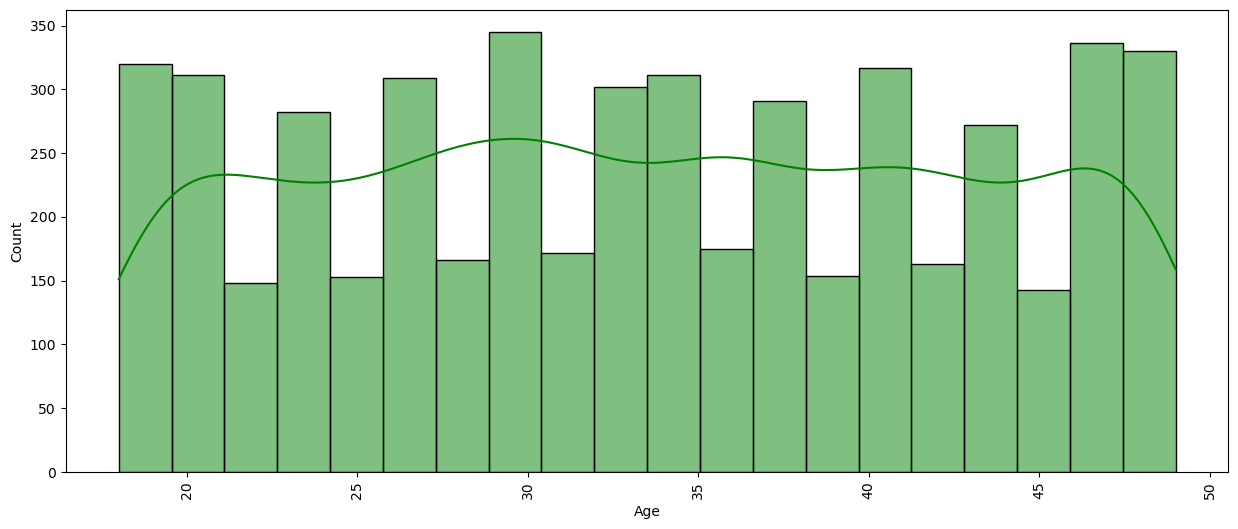

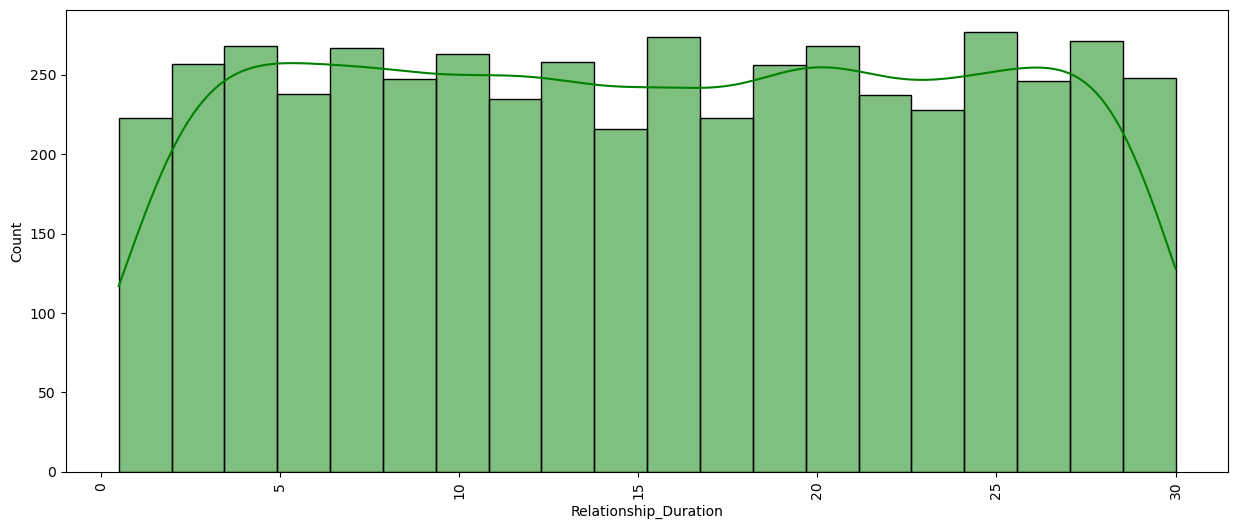

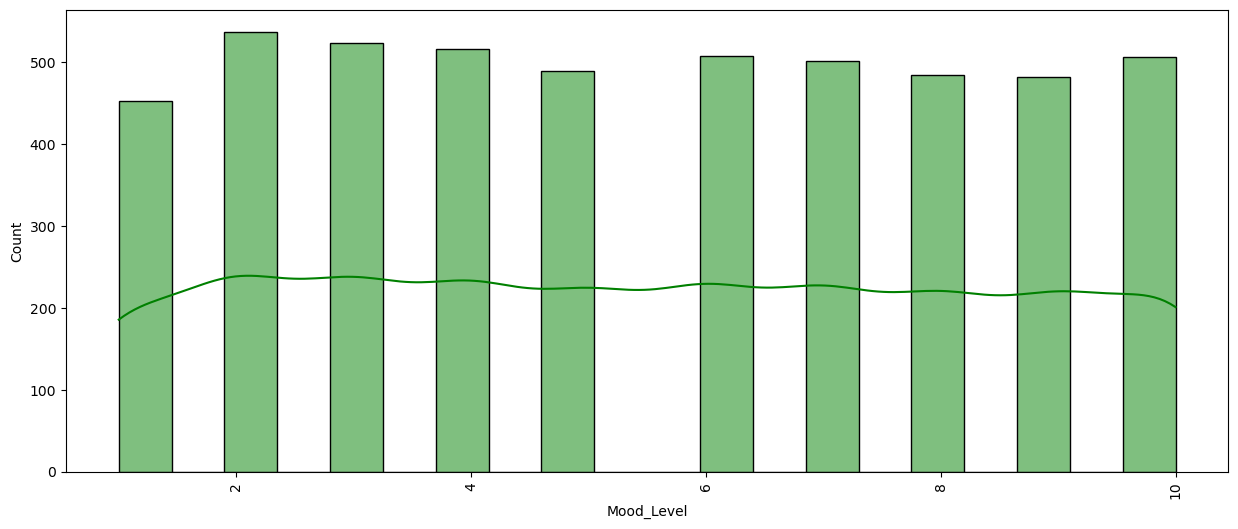

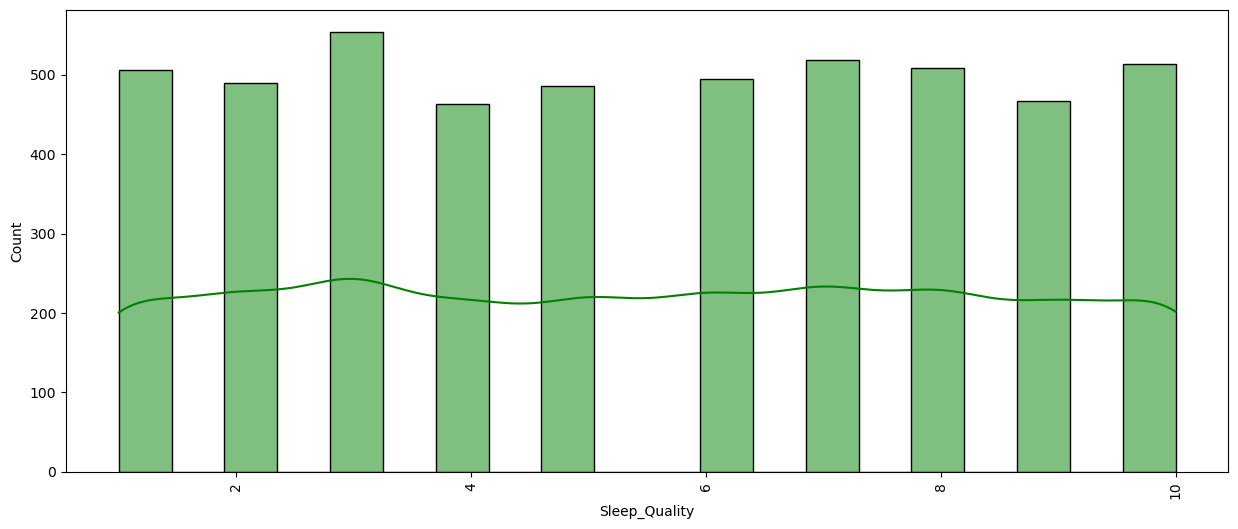

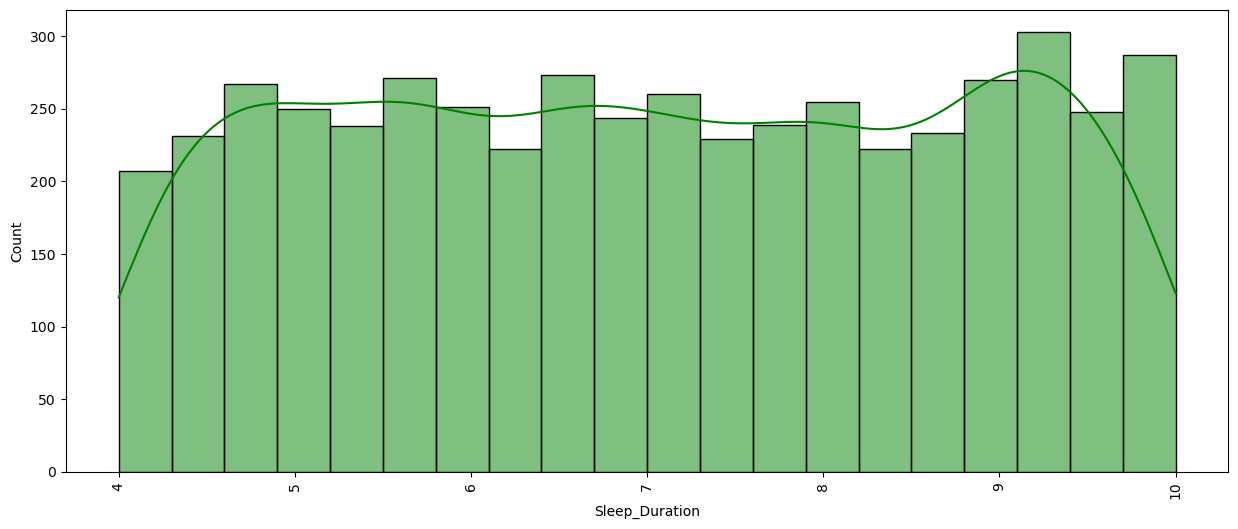

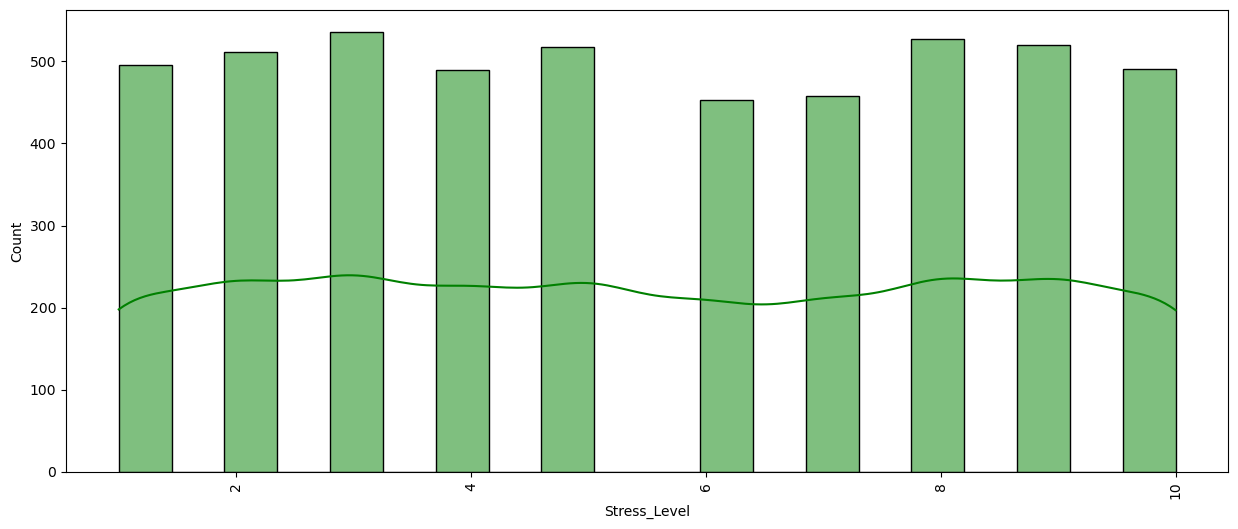

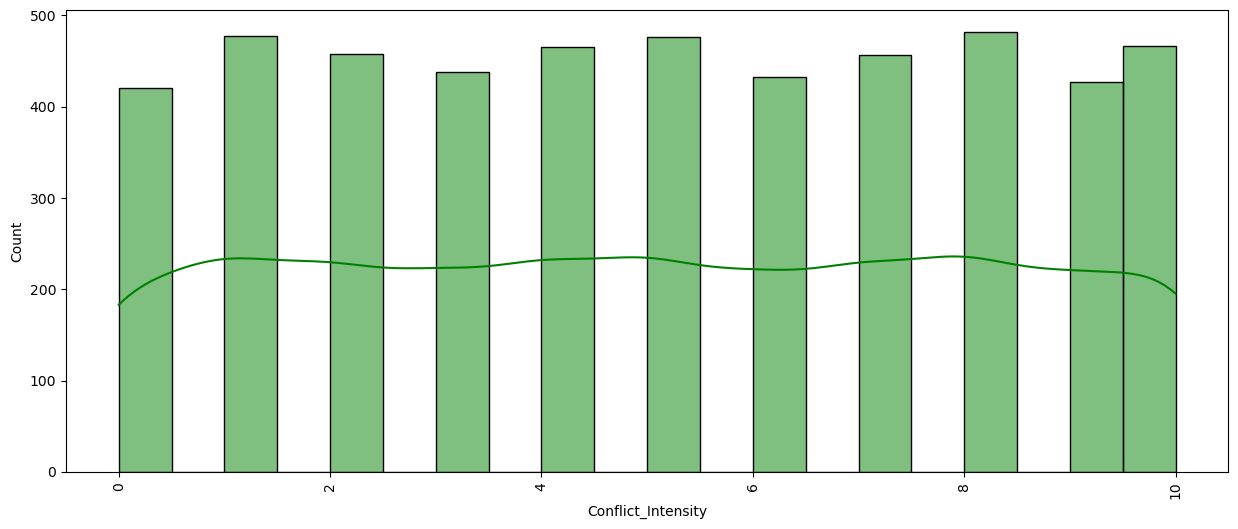

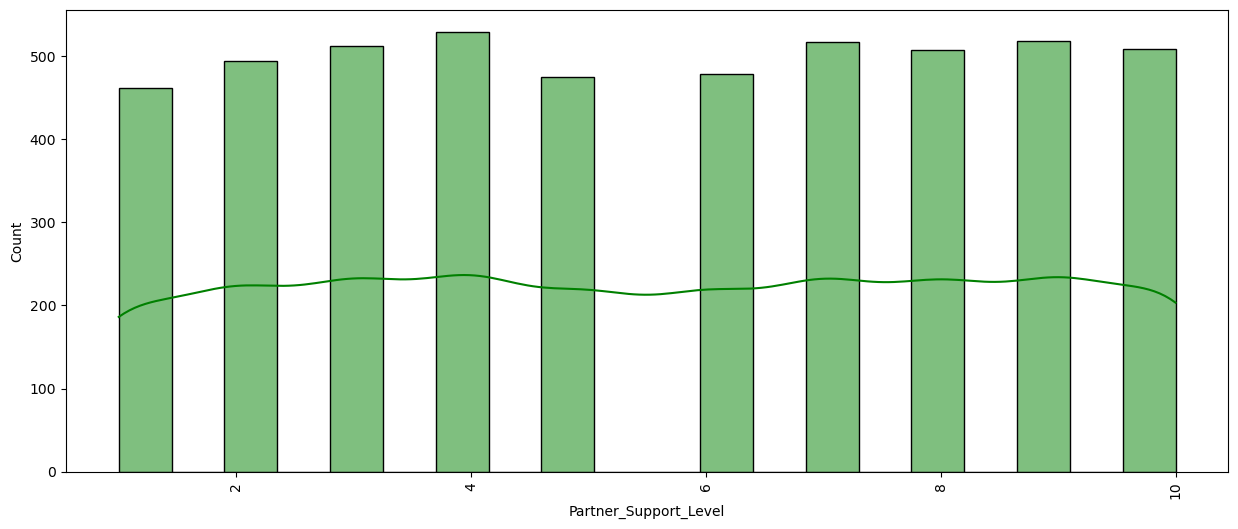

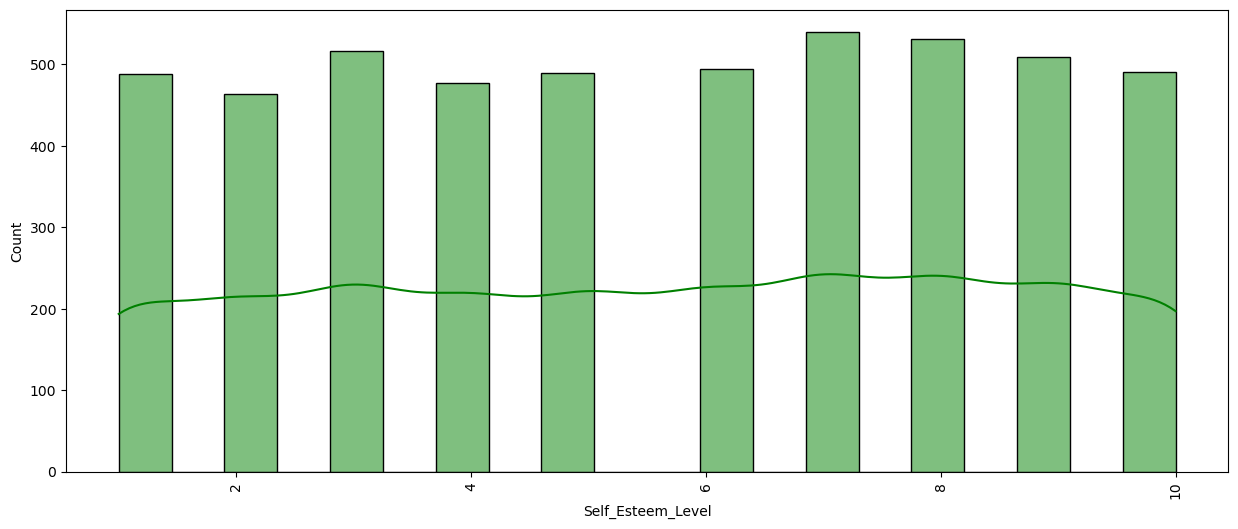

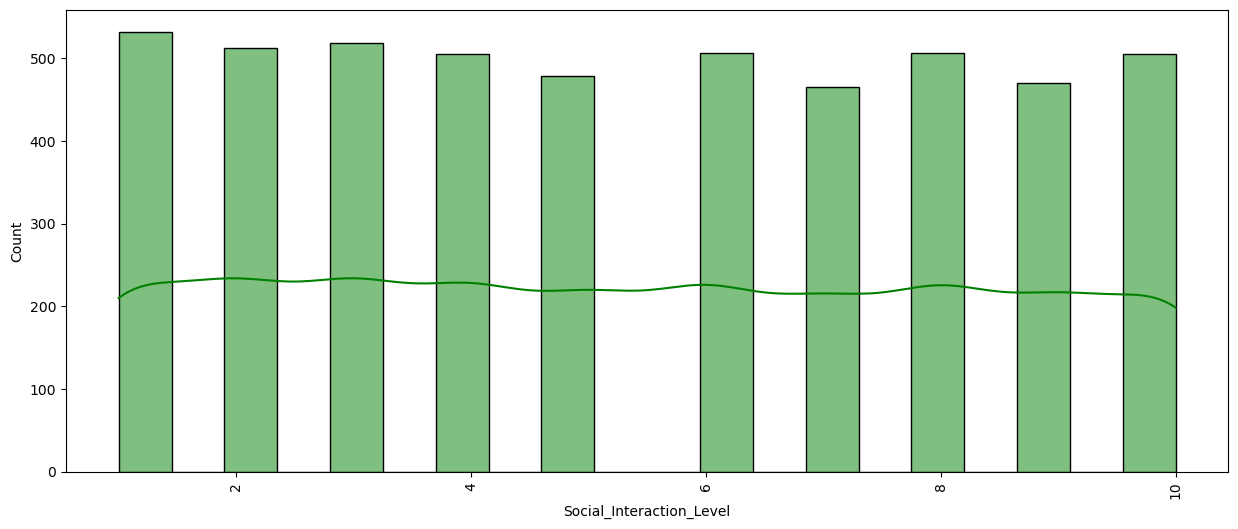

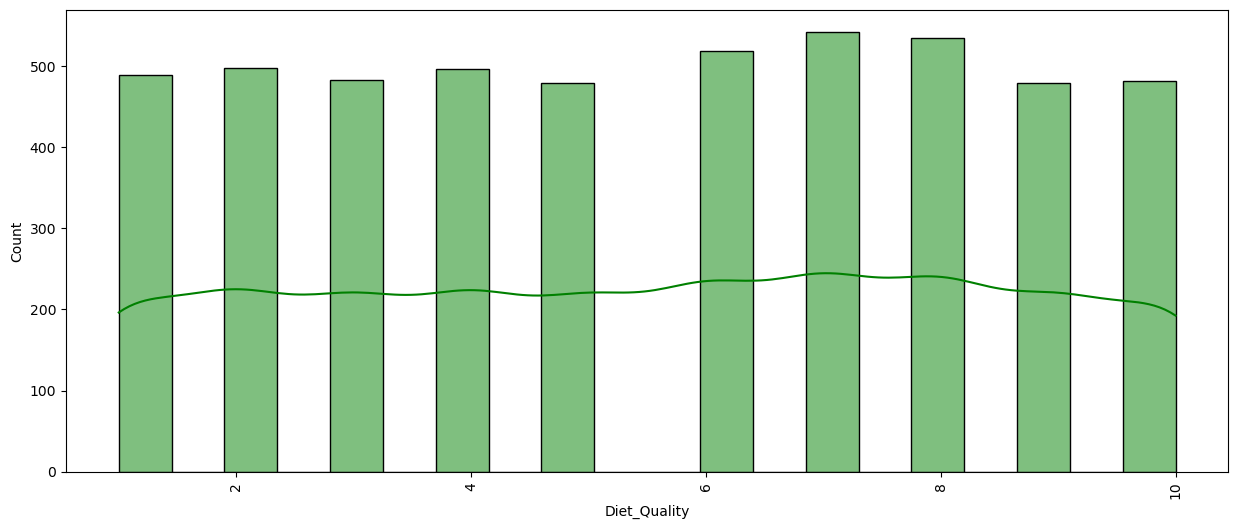

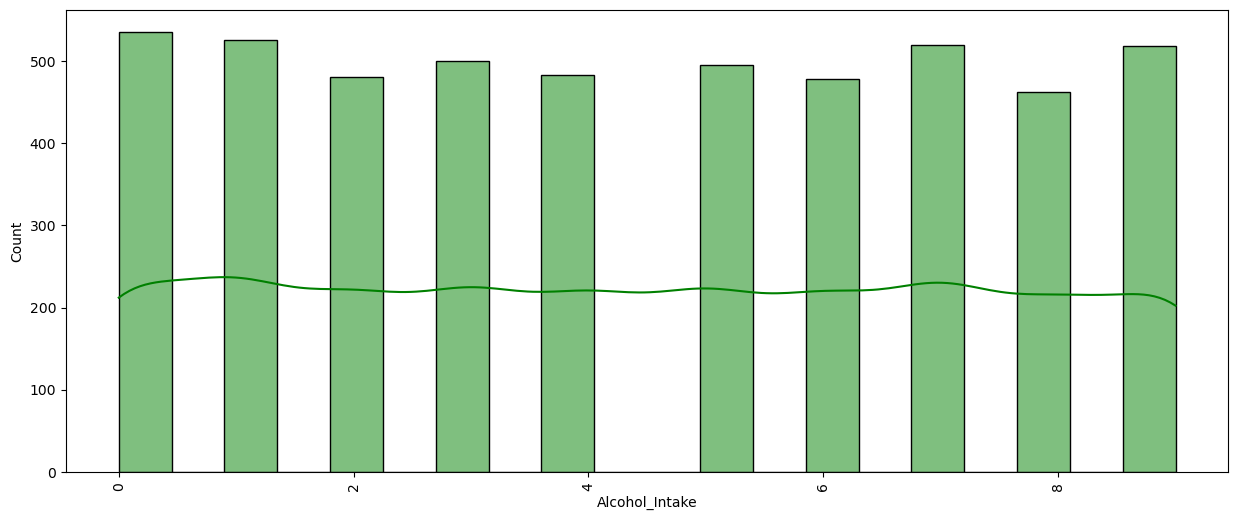

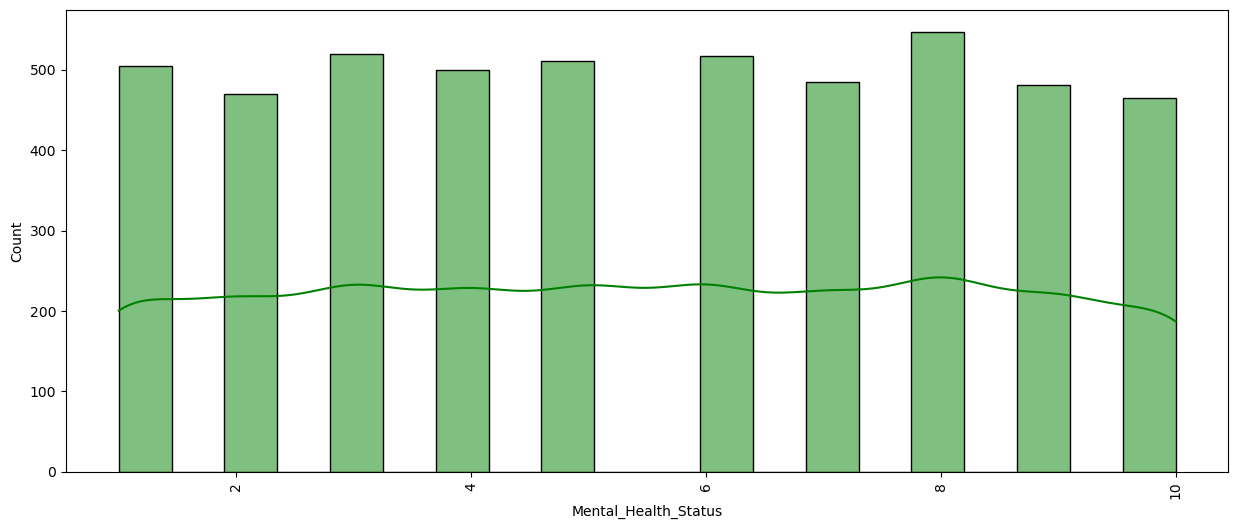

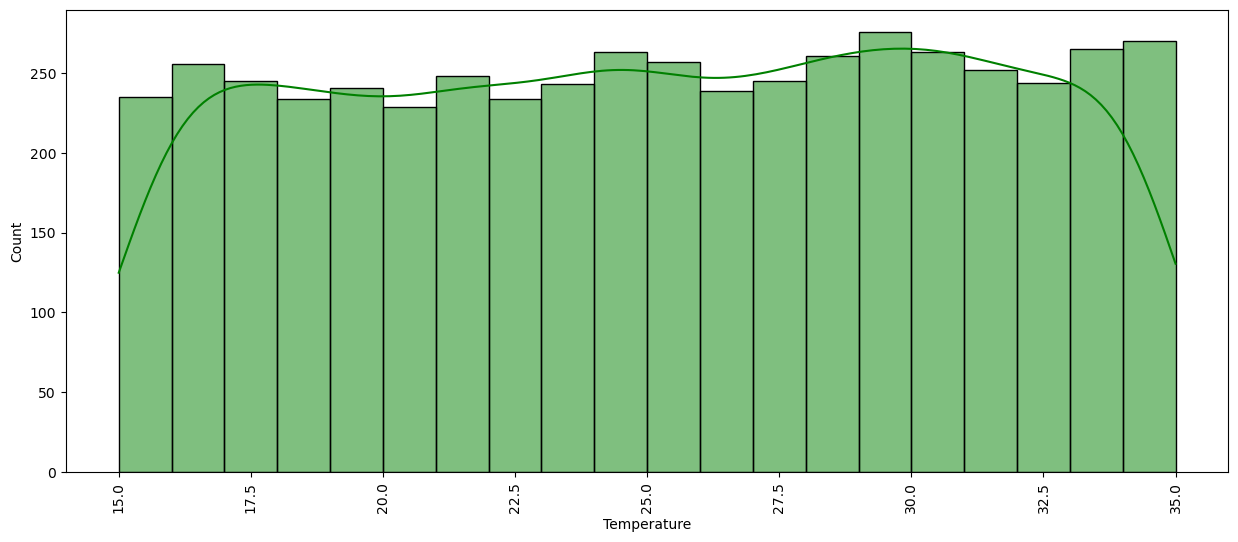

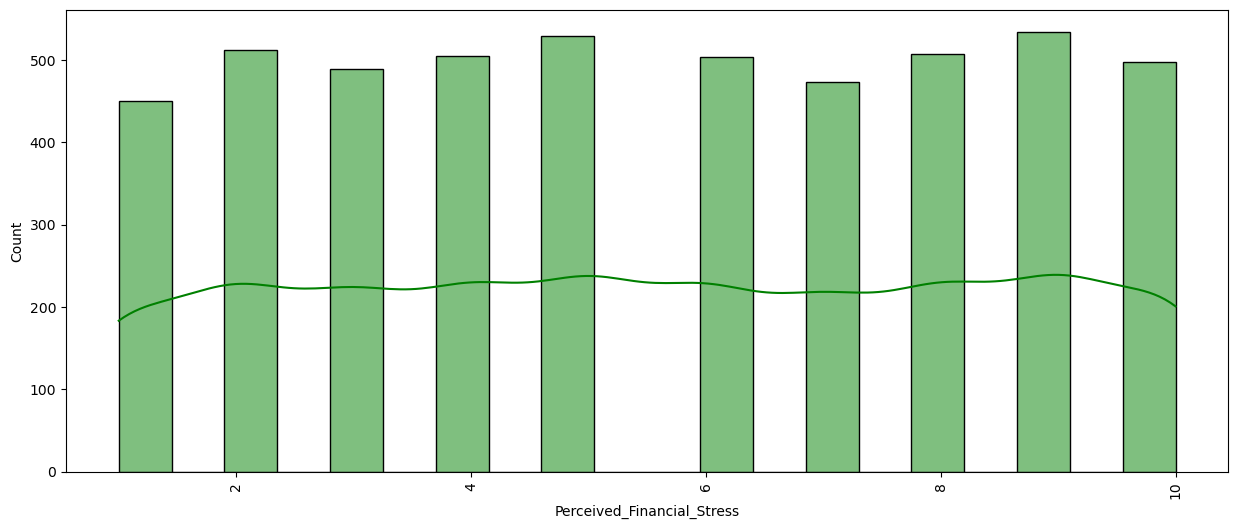

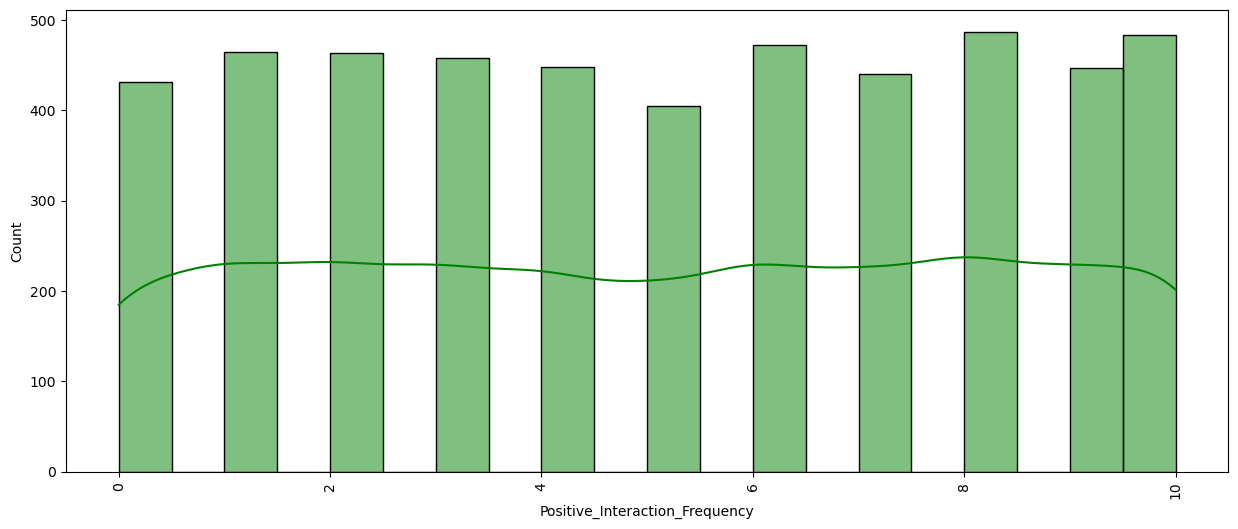

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, color='g', palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

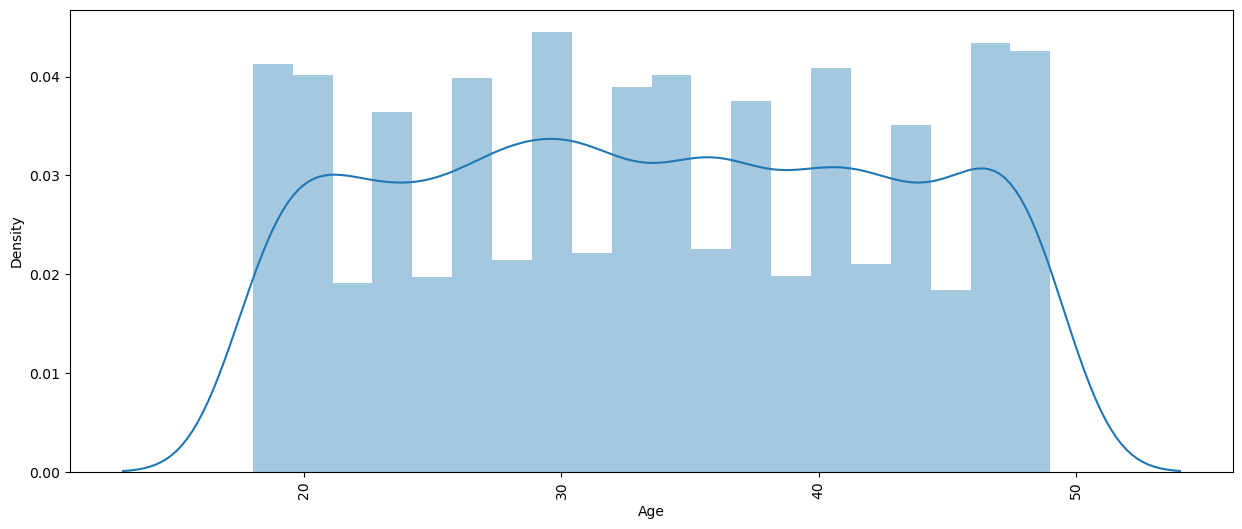

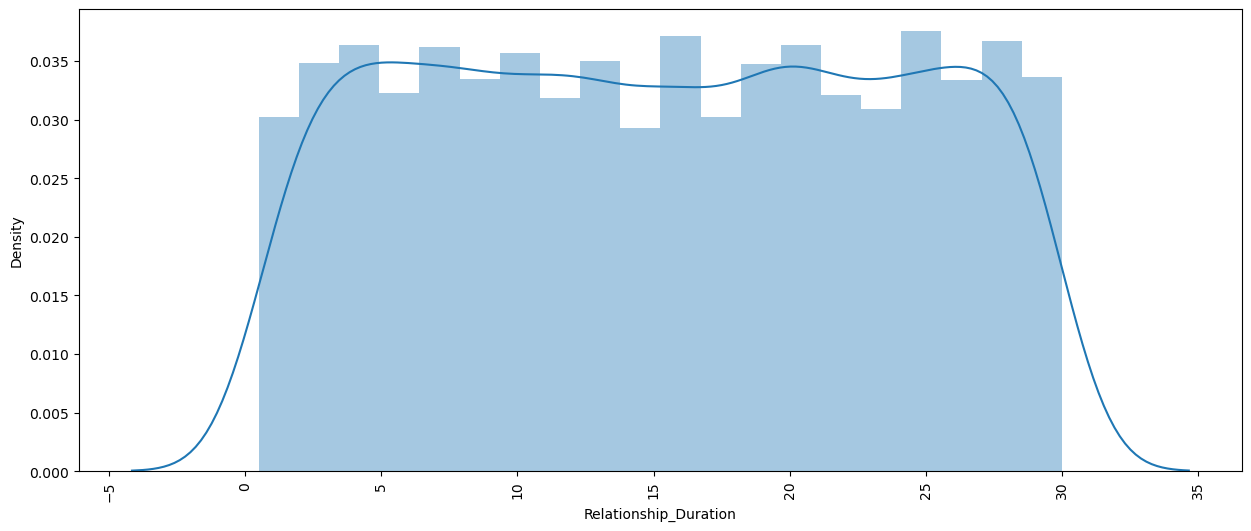

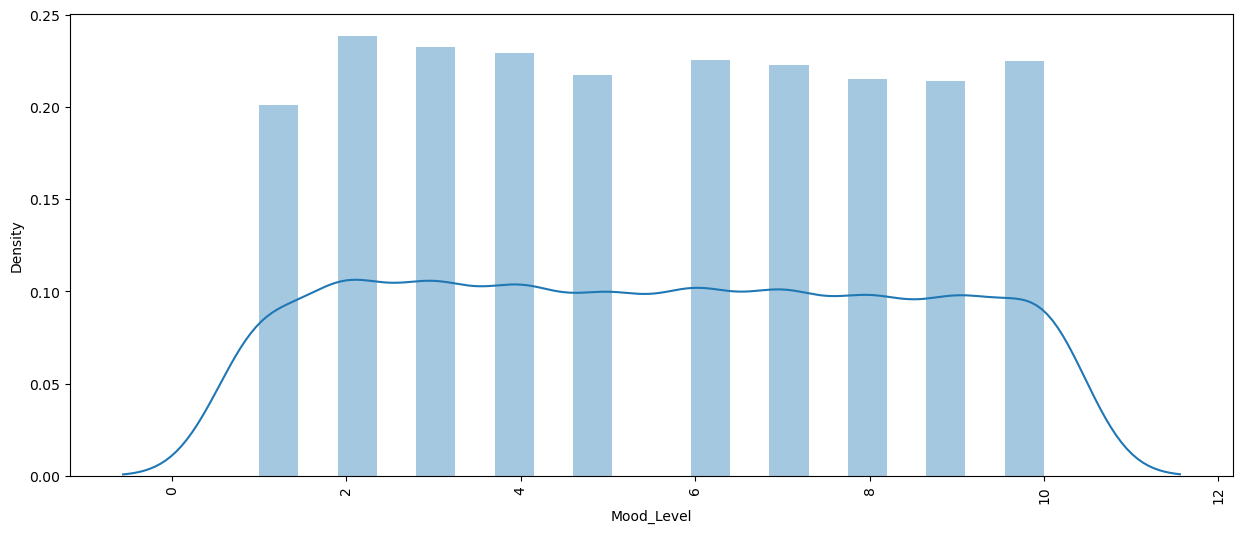

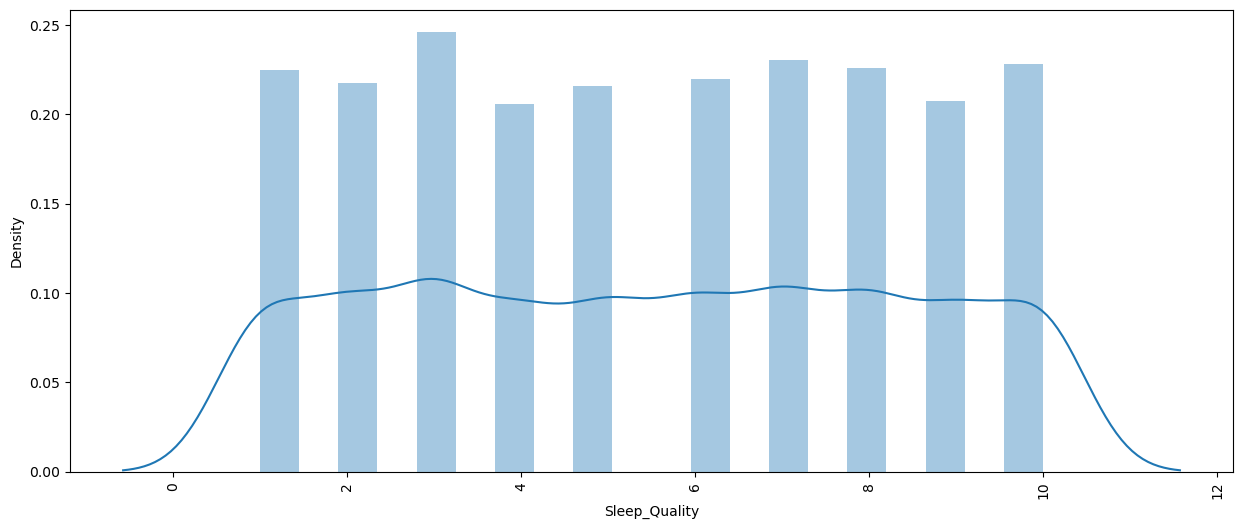

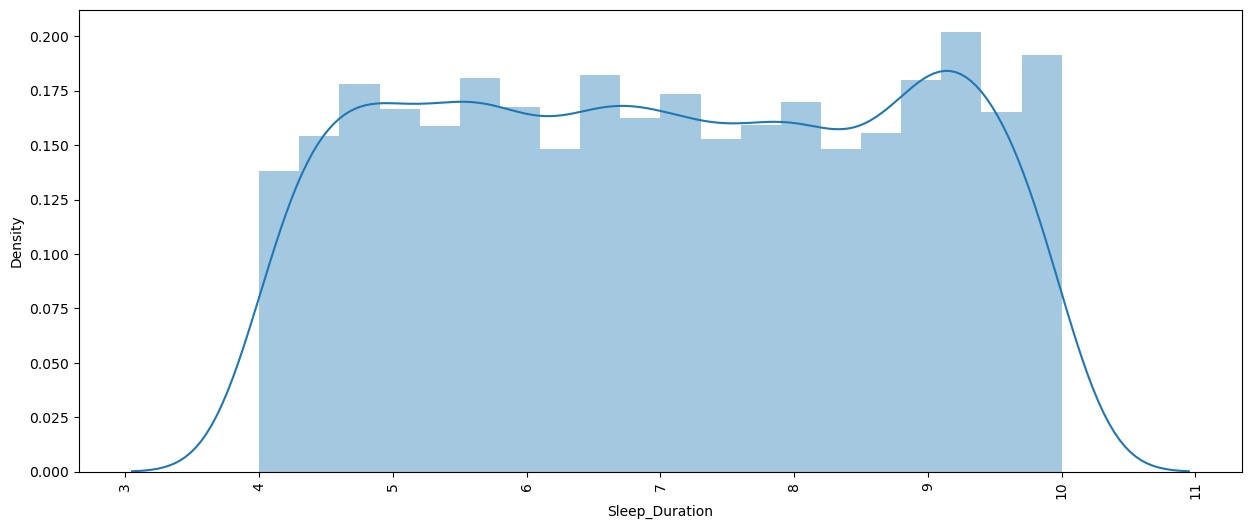

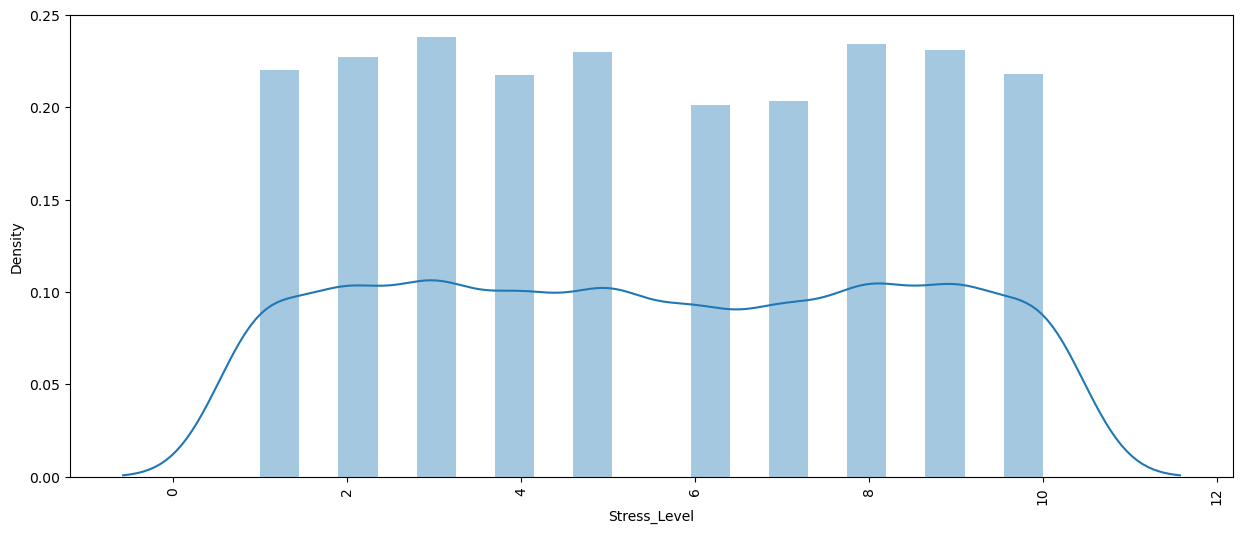

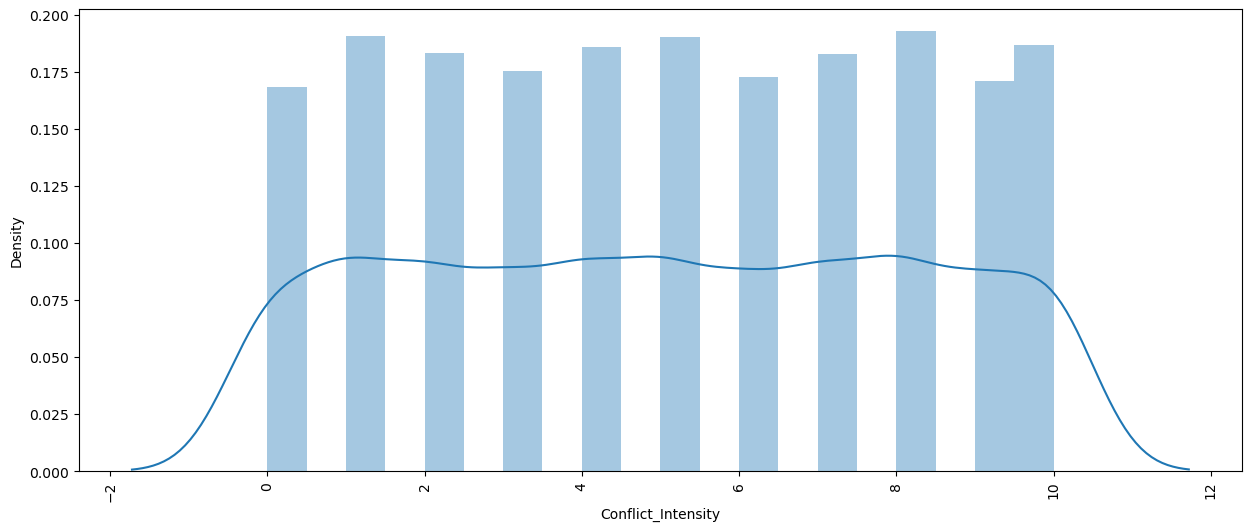

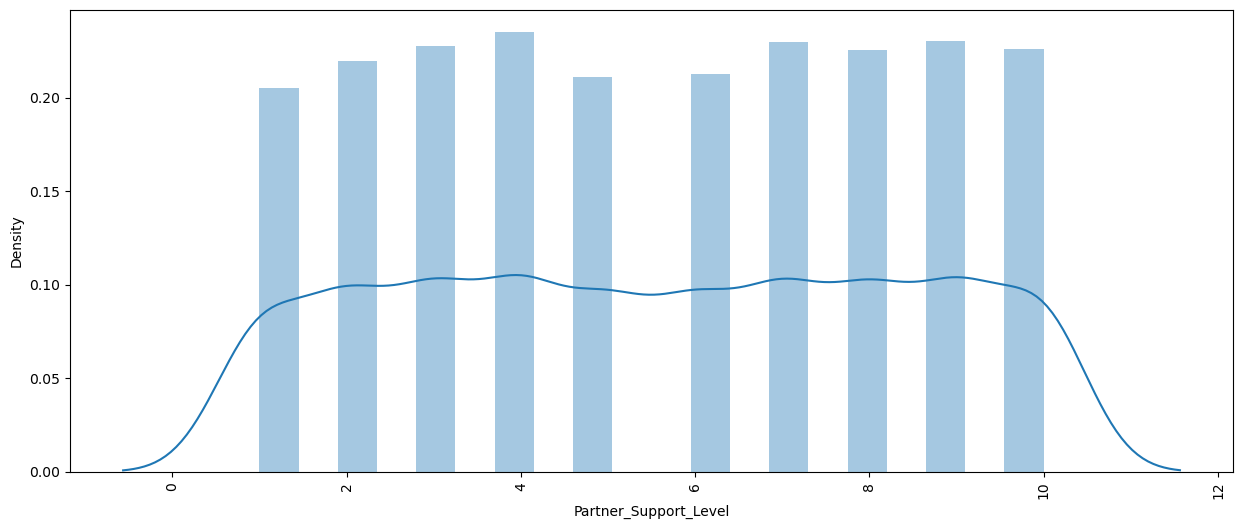

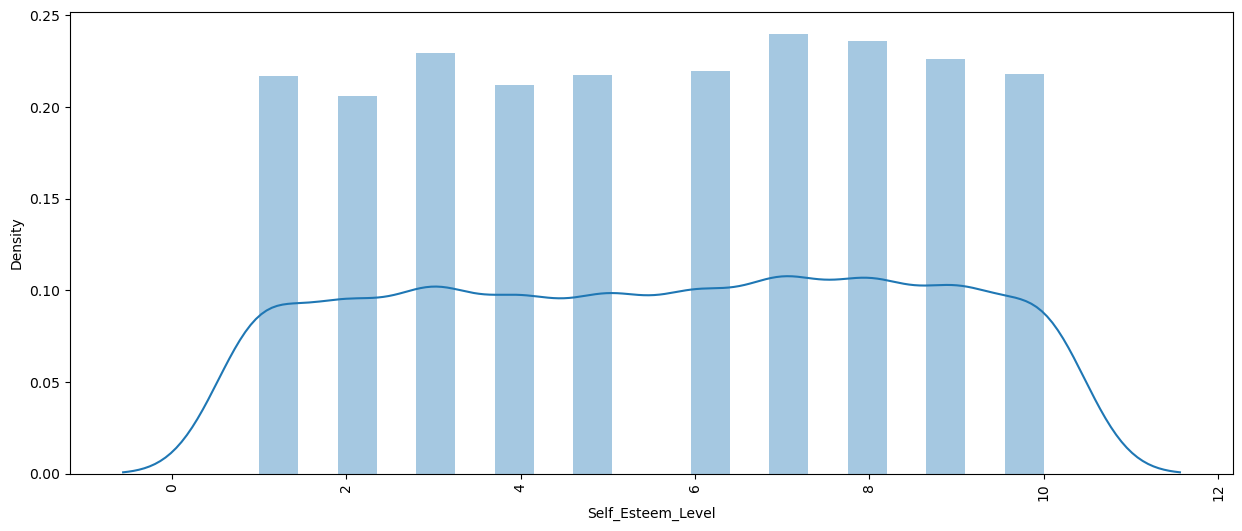

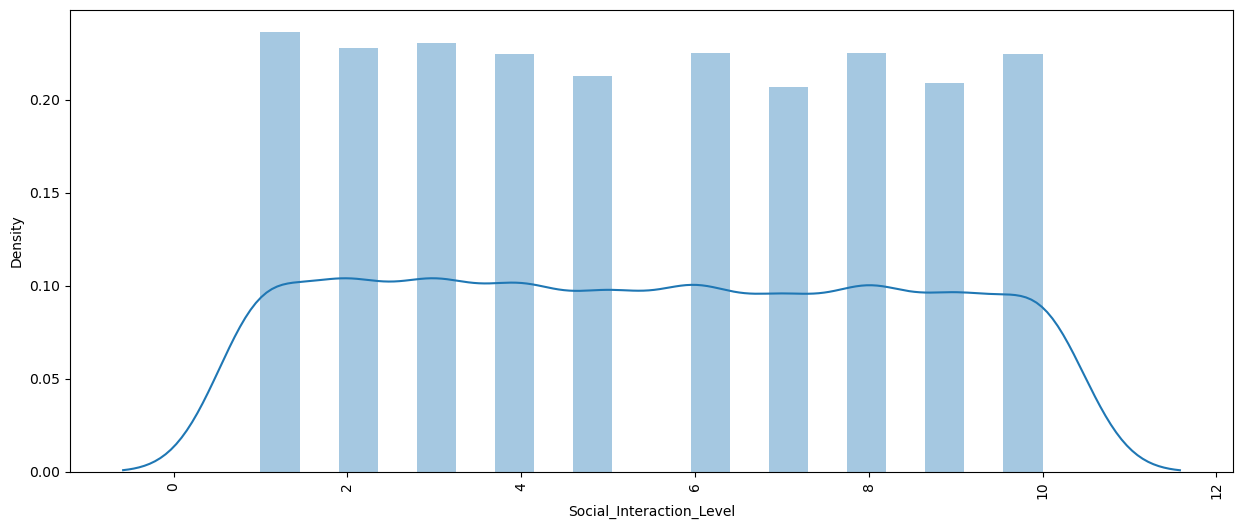

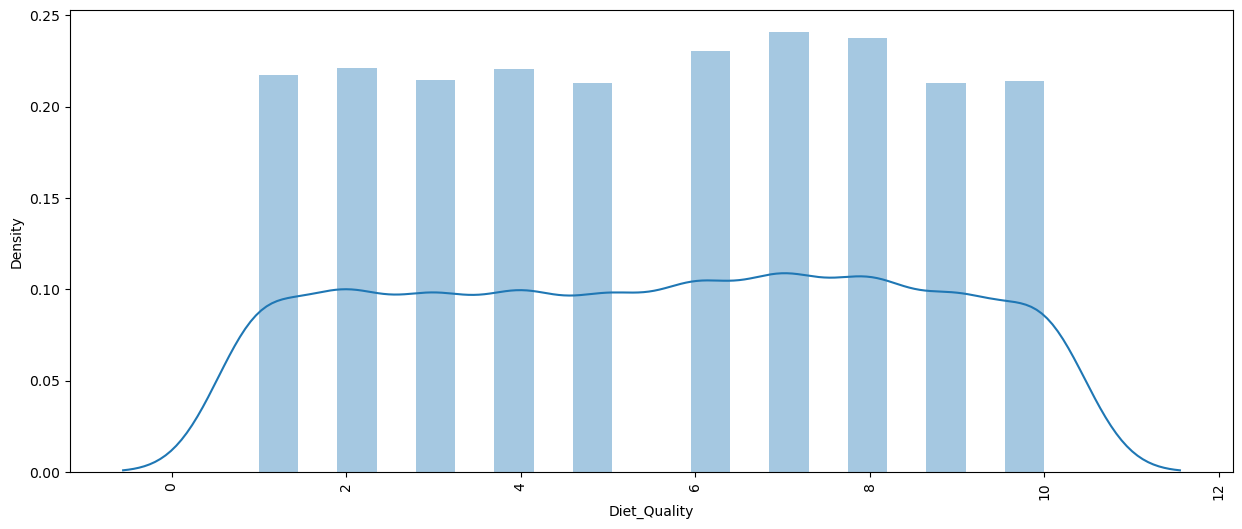

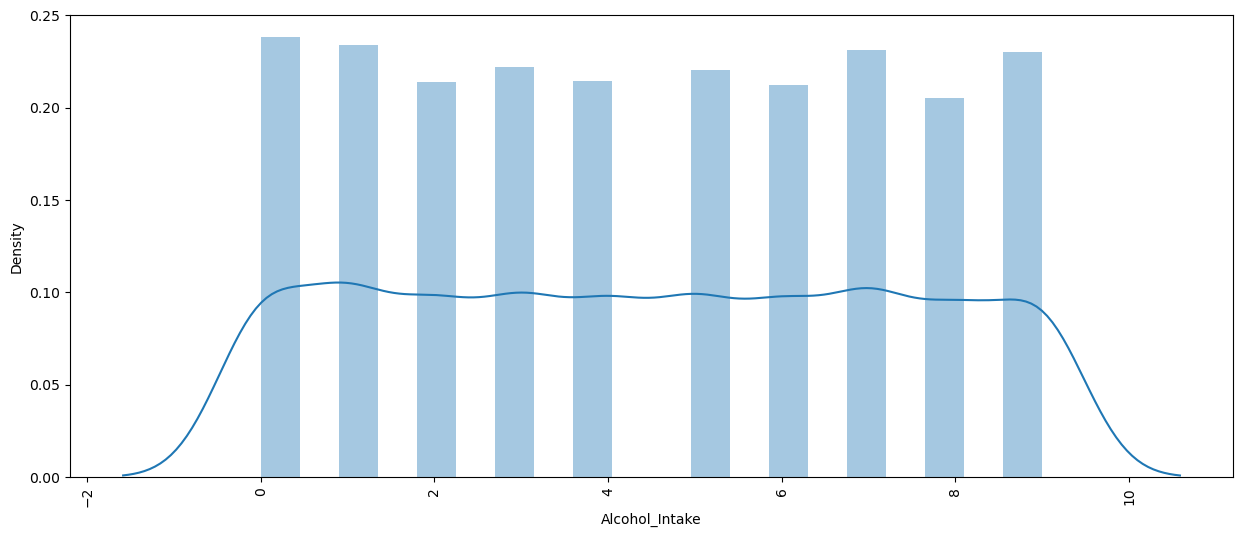

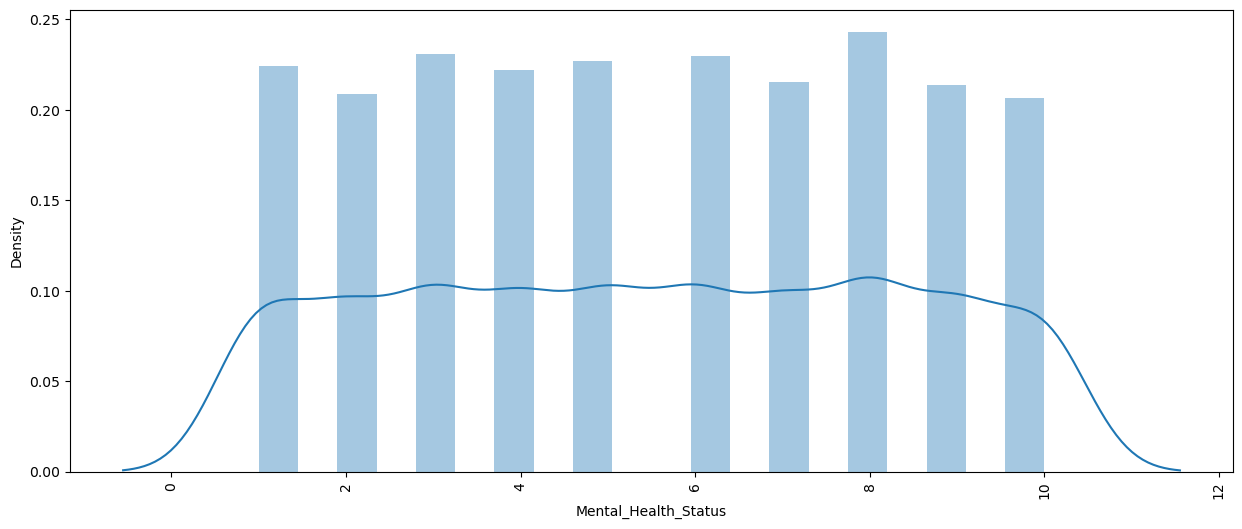

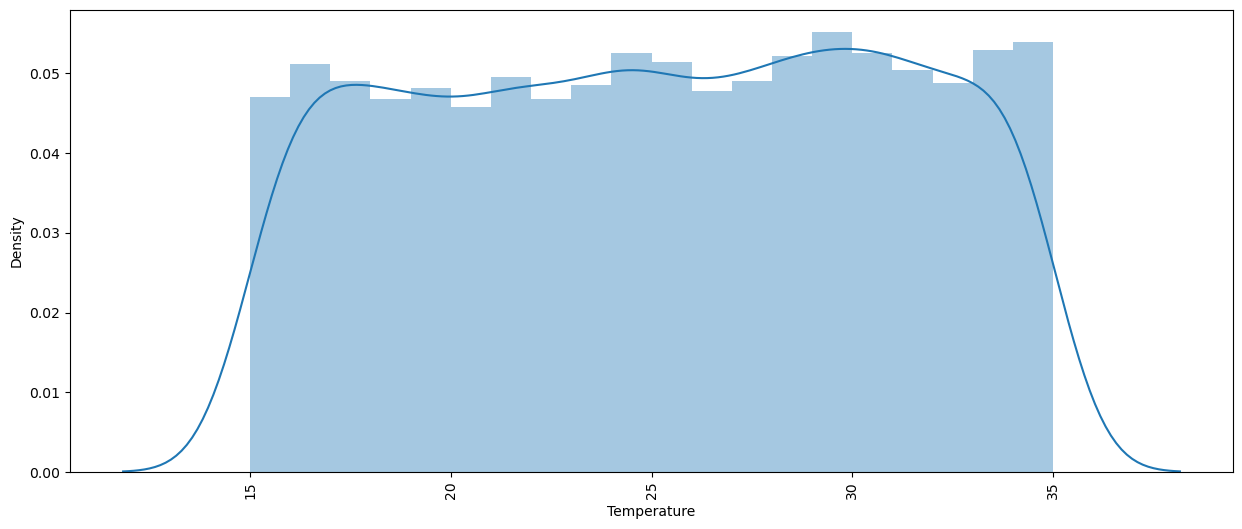

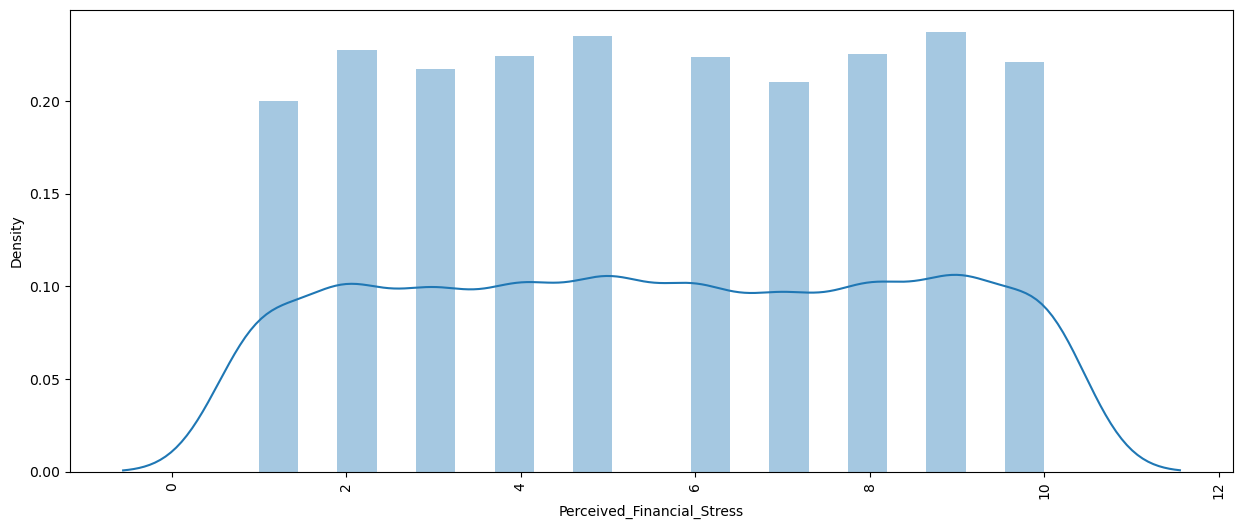

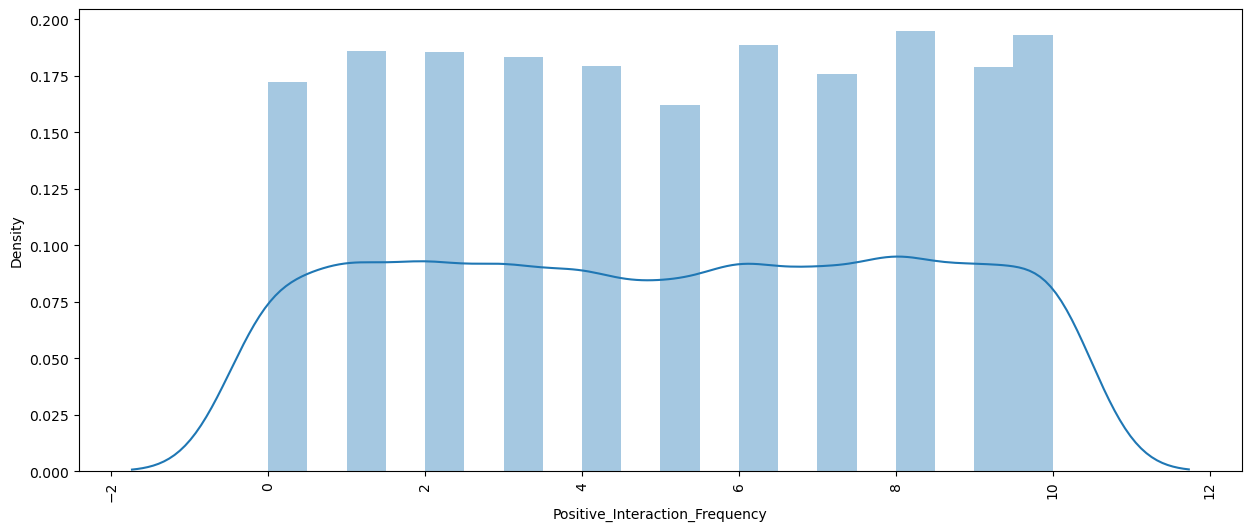

In [22]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

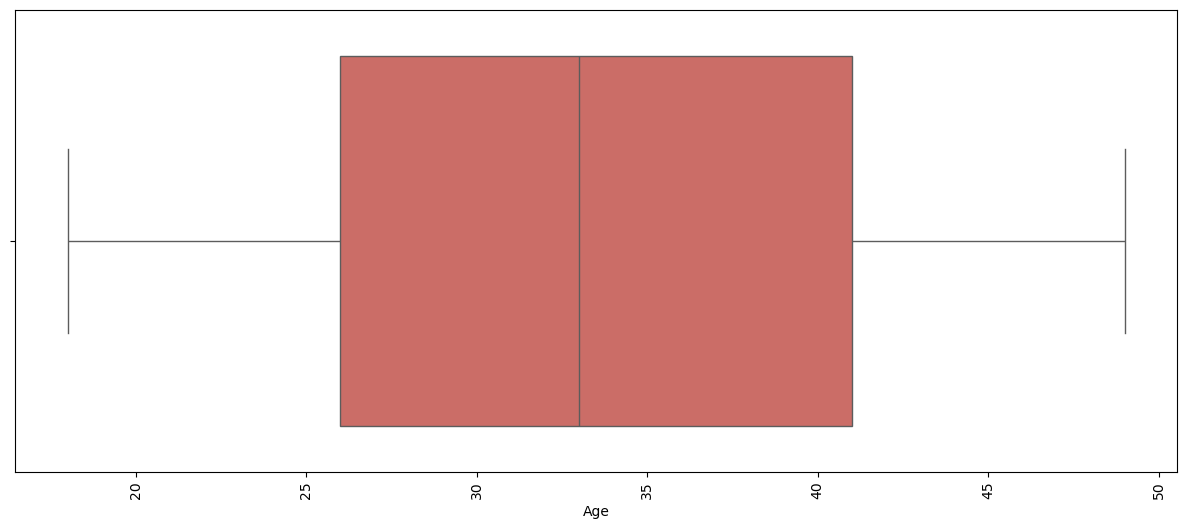

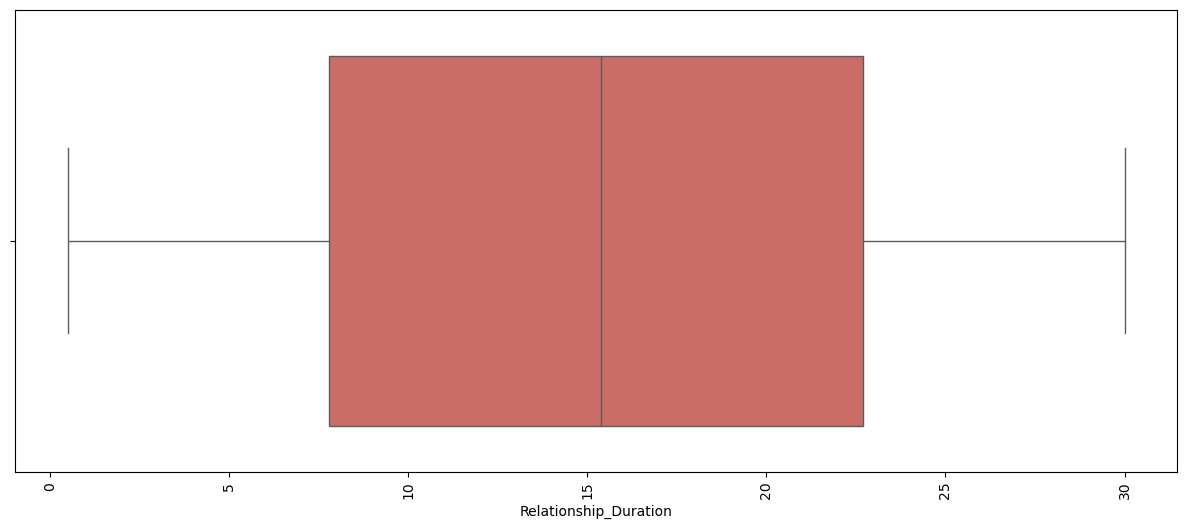

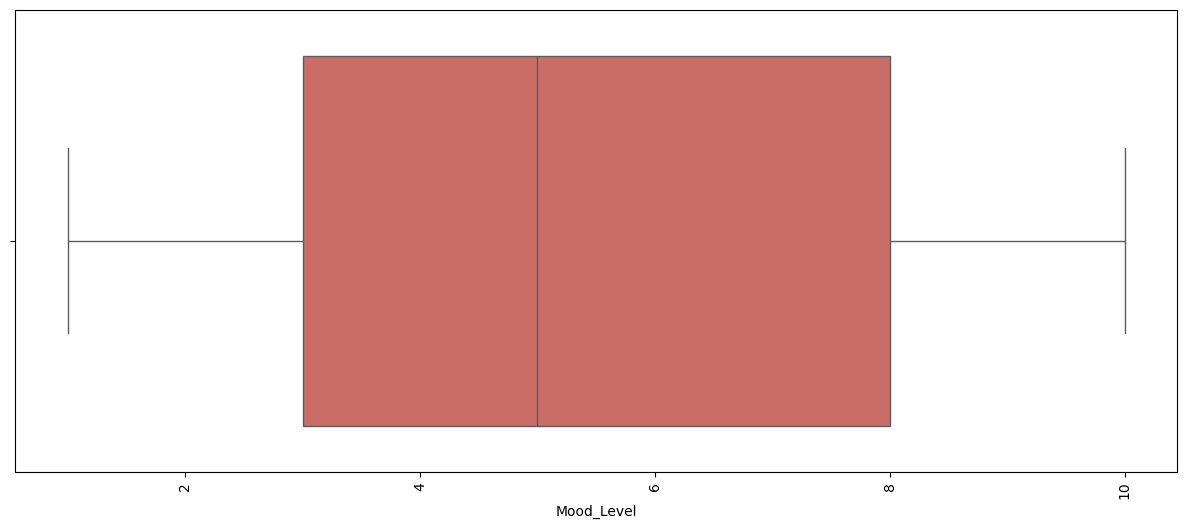

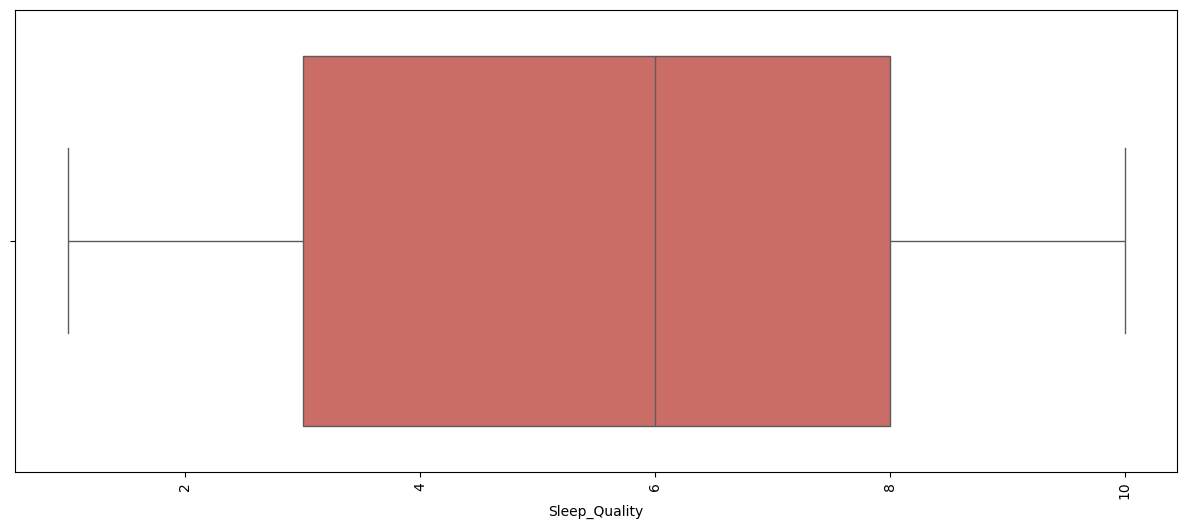

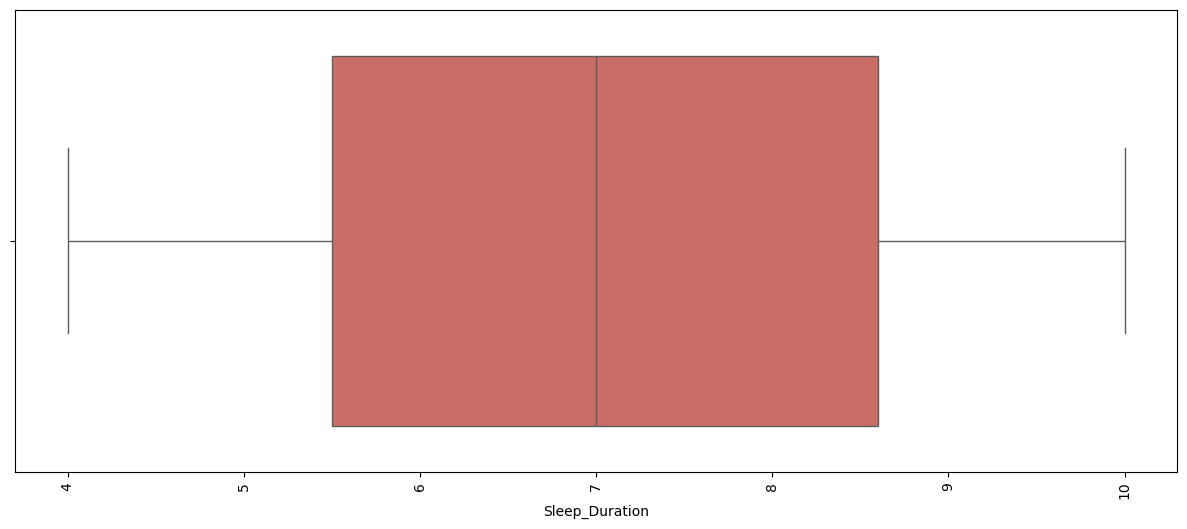

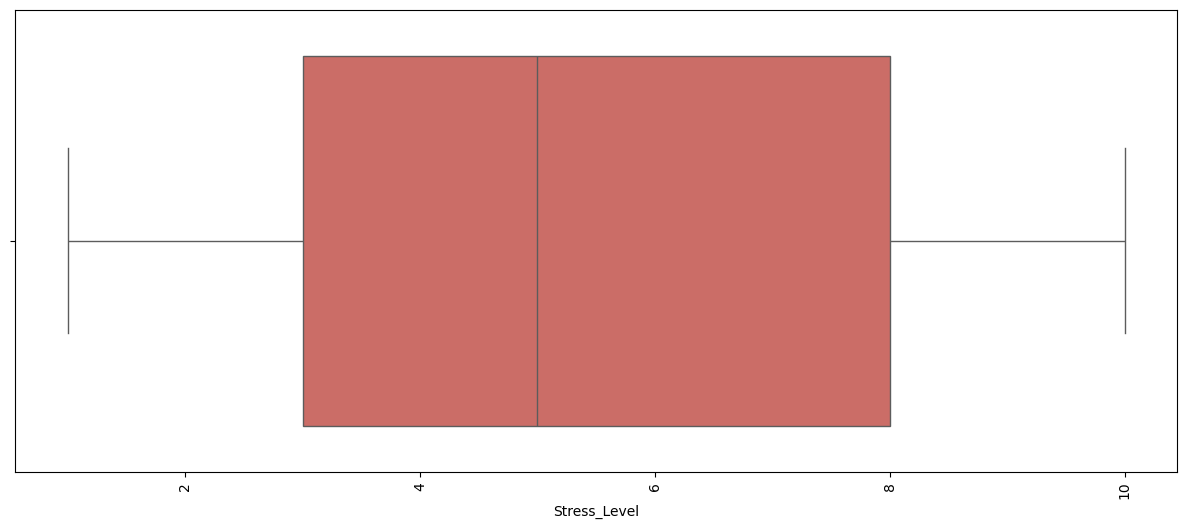

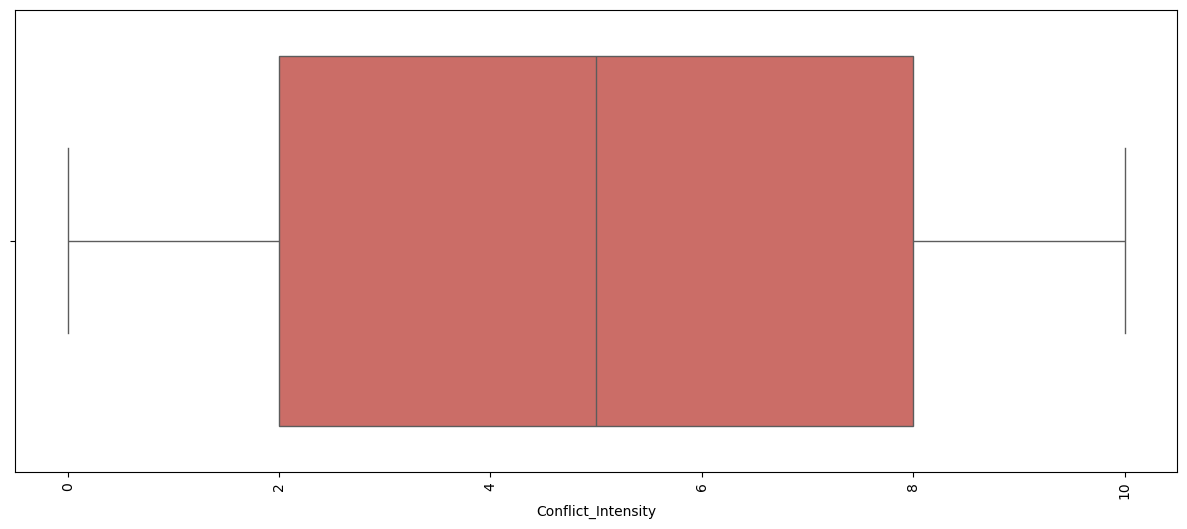

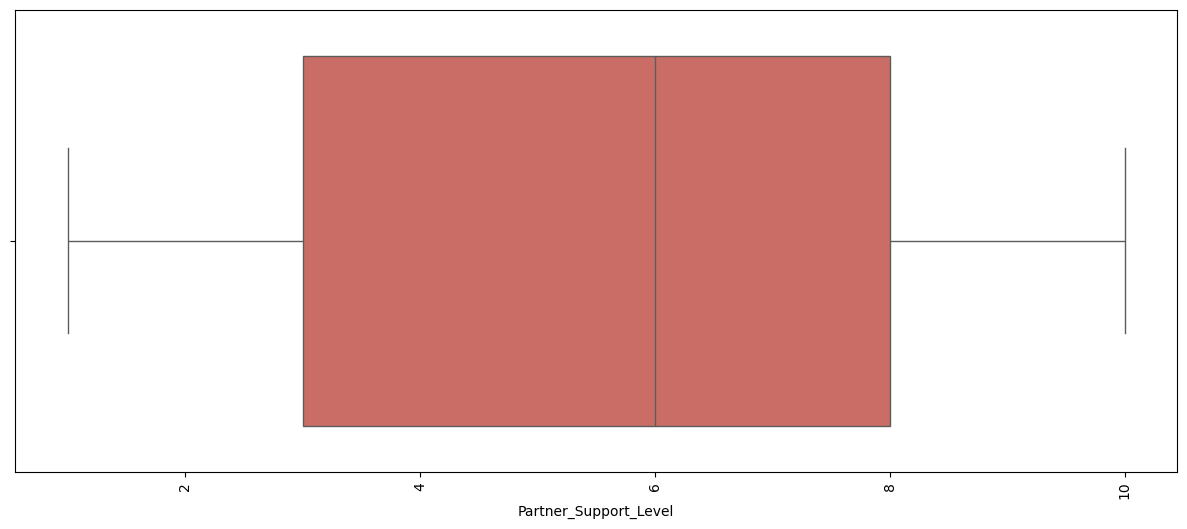

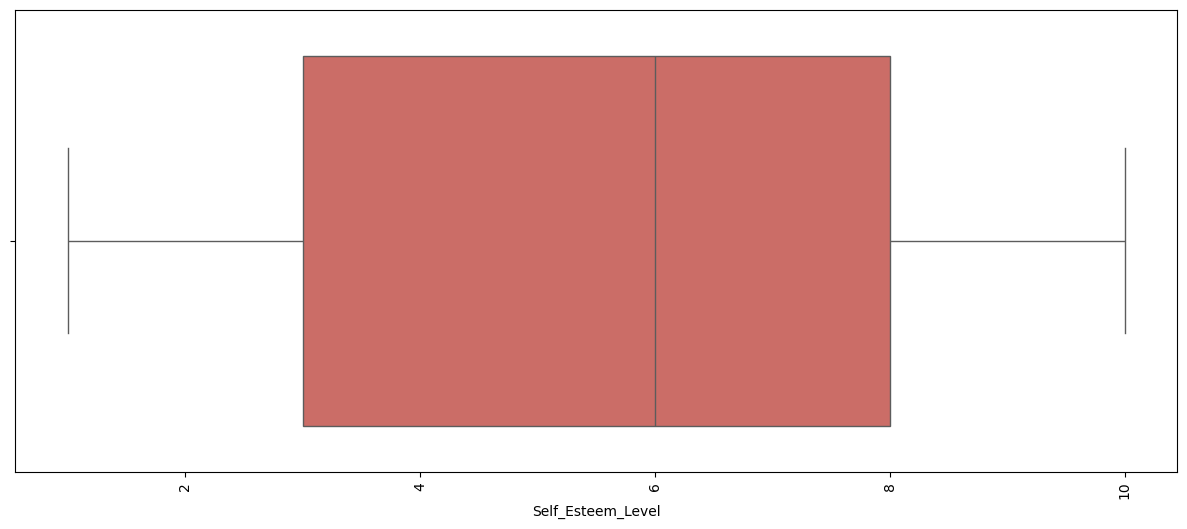

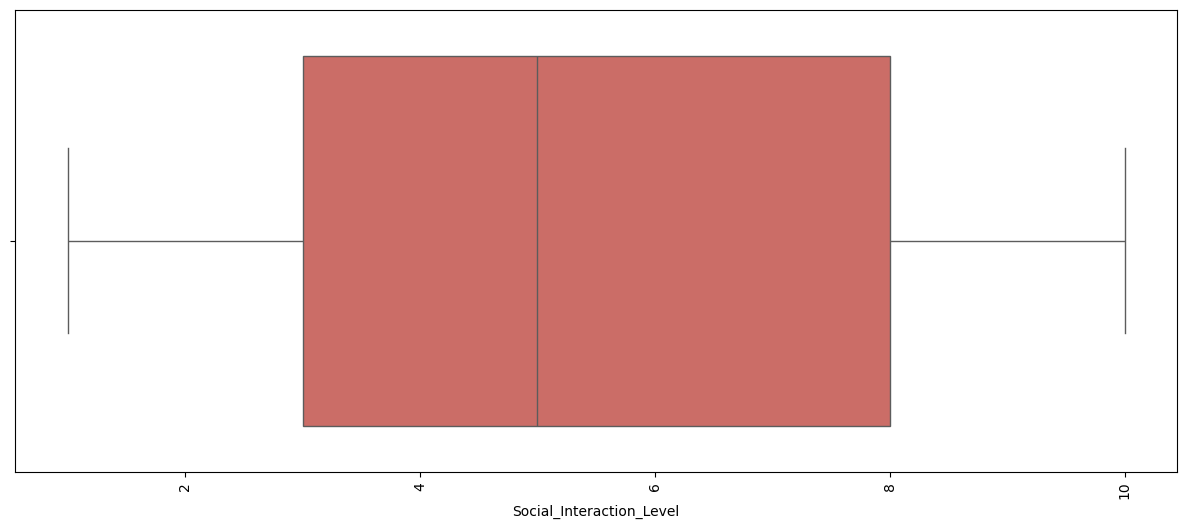

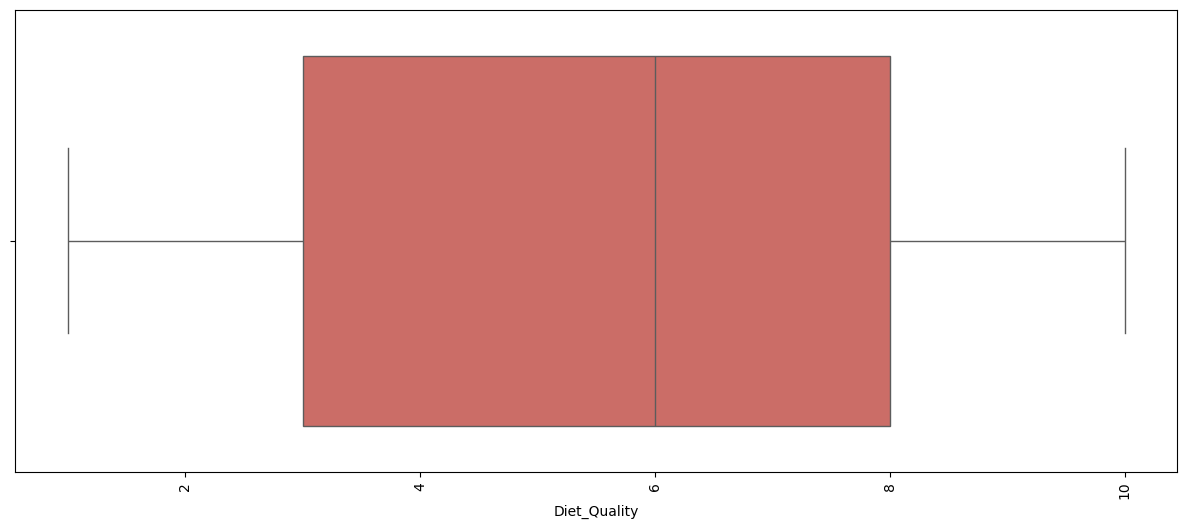

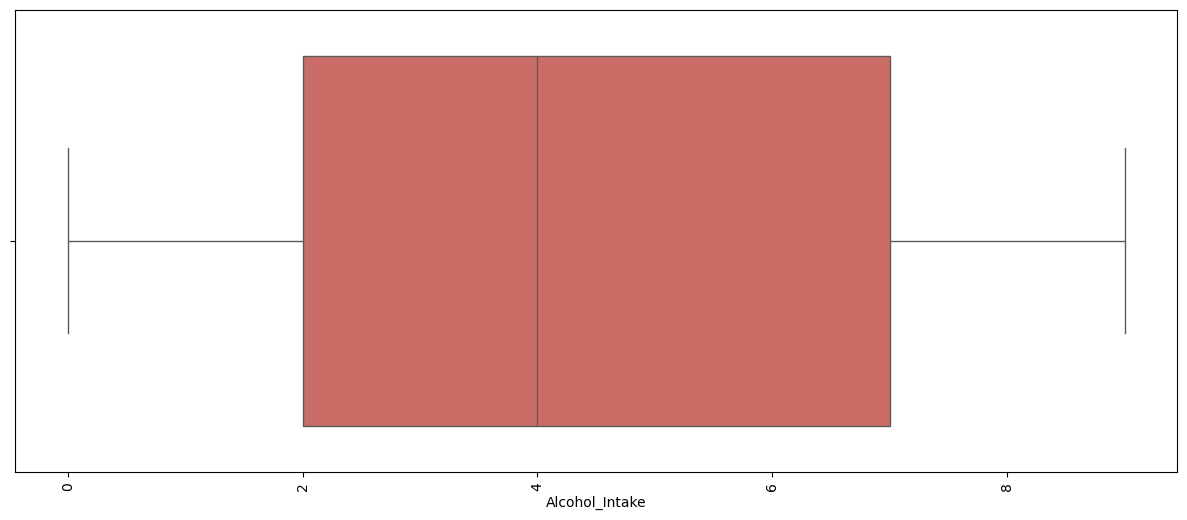

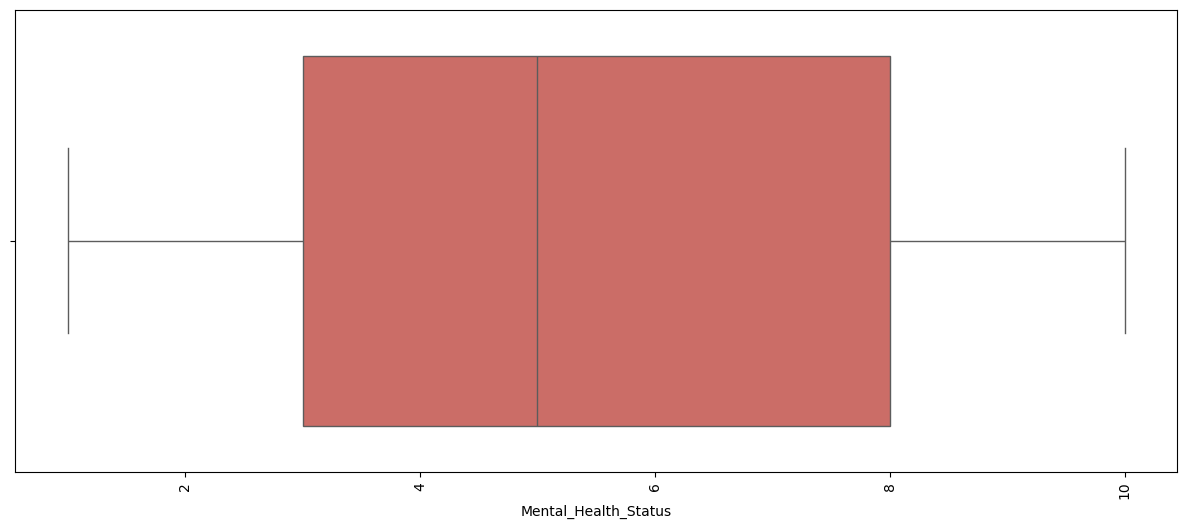

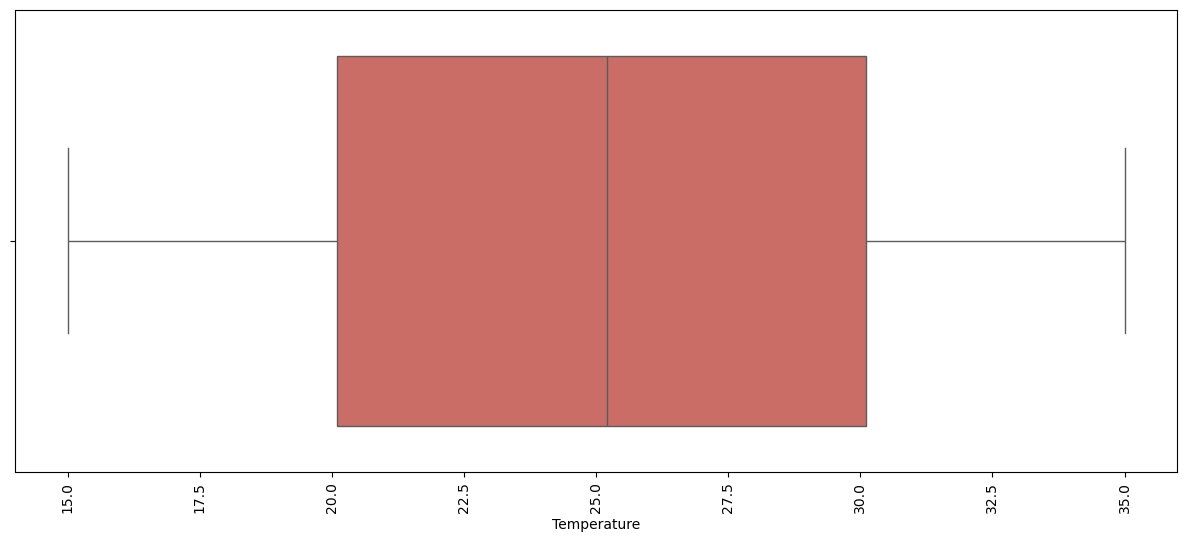

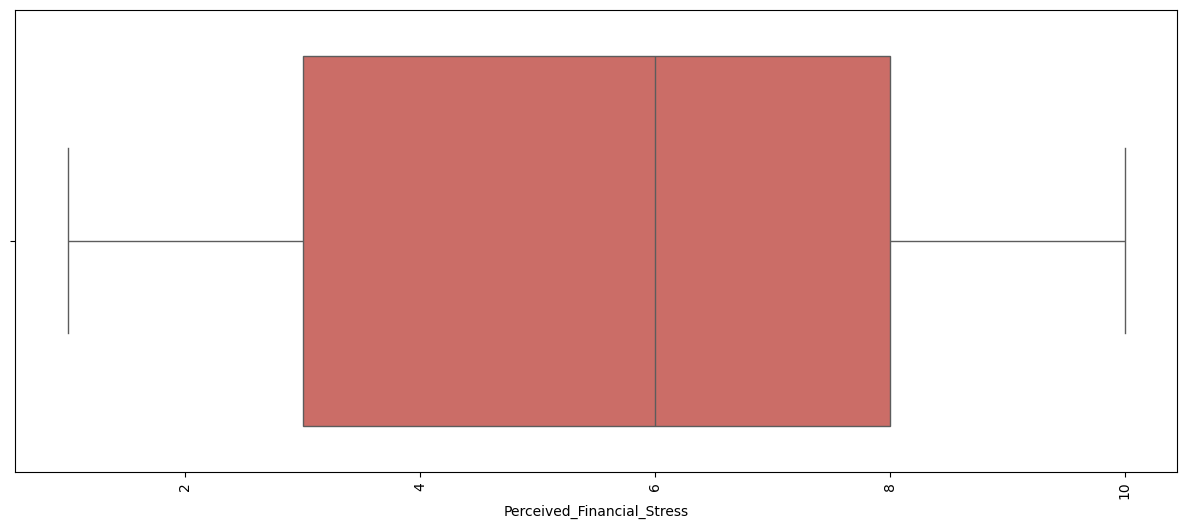

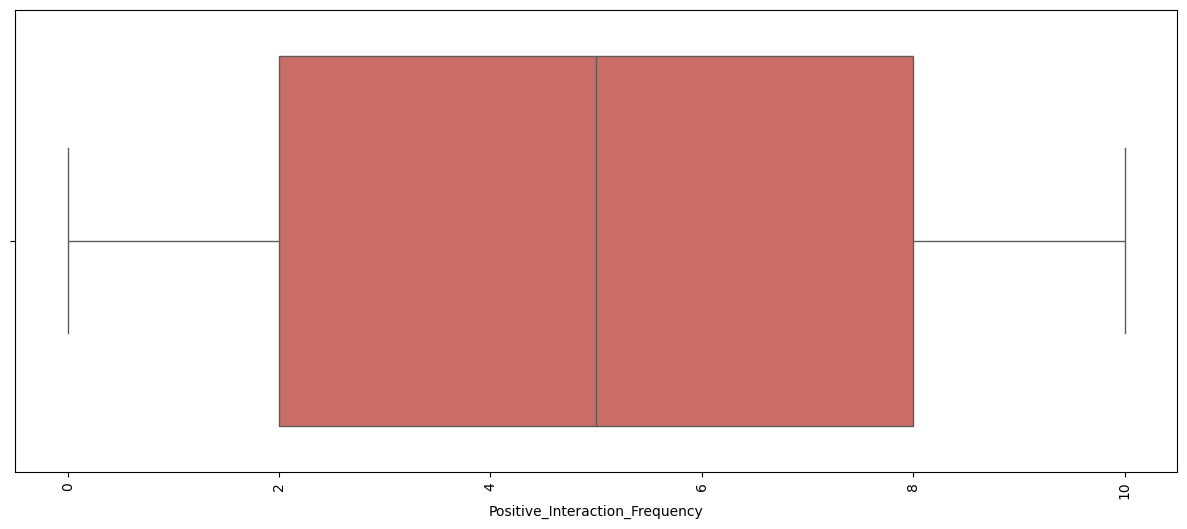

In [23]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [24]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

Caffeine_Intake
[4 0 1 2 3]

Weekly_Self_Care_Activities
[1 2 4 3 6 0 5]



In [25]:
for i in discrete:
    print(i)
    print(df[i].value_counts())
    print()

Caffeine_Intake
Caffeine_Intake
0    1037
1    1007
4     994
3     982
2     980
Name: count, dtype: int64

Weekly_Self_Care_Activities
Weekly_Self_Care_Activities
5    755
4    727
3    723
1    708
6    705
0    696
2    686
Name: count, dtype: int64



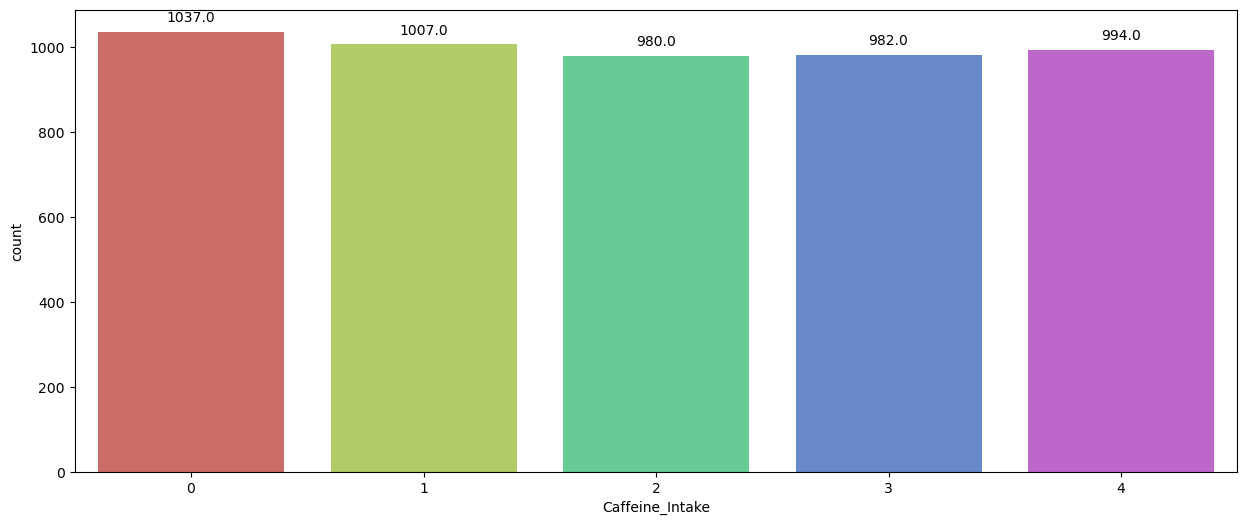

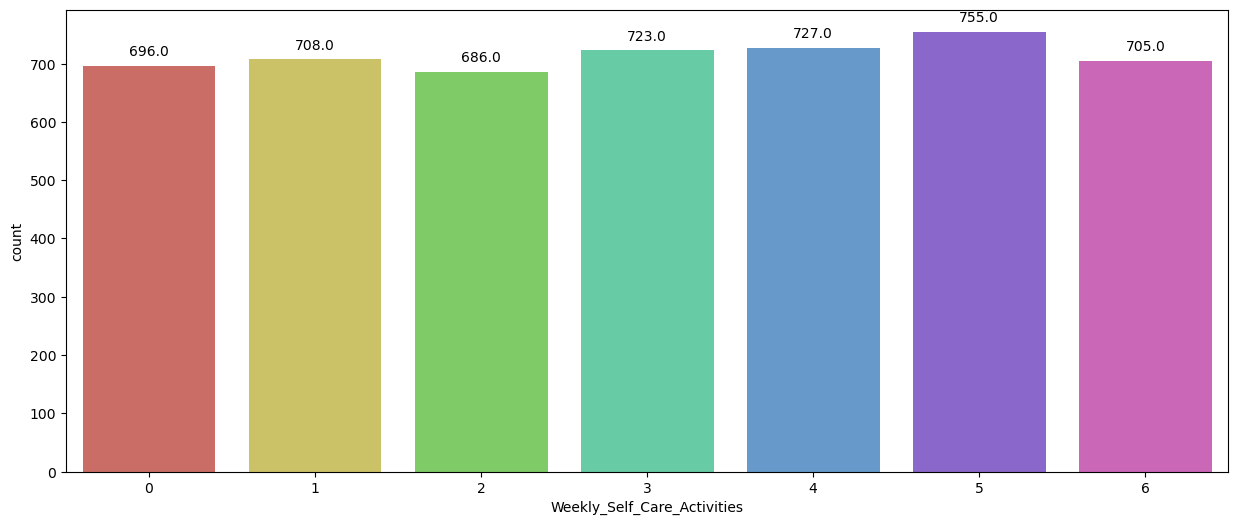

In [26]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

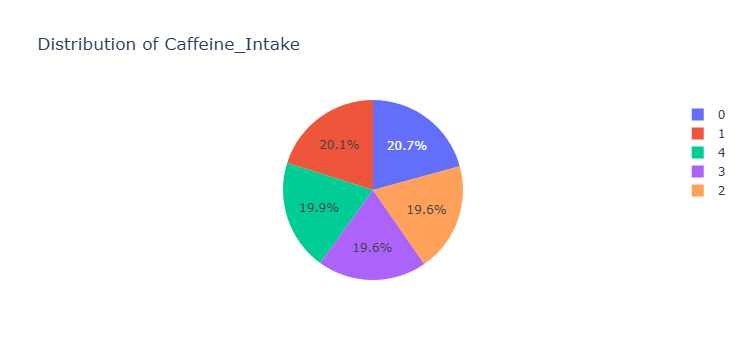

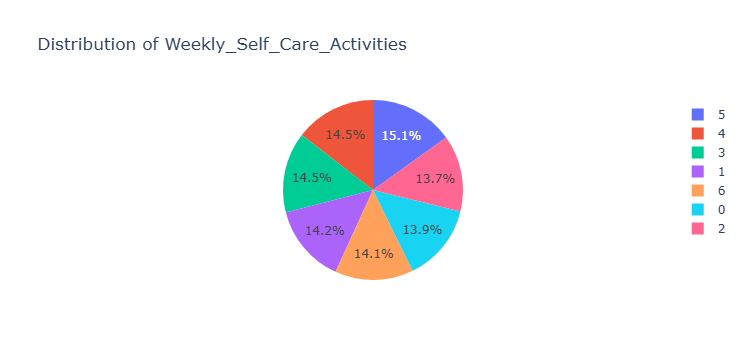

In [27]:
for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [28]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Relationship_Role
['Wife' 'Girlfriend']

Time_of_Day
['Morning' 'Evening' 'Night' 'Afternoon']

Menstrual_Phase
['Ovulation' 'Follicular' 'Menstrual' 'Luteal']

PMS_Symptoms
['Yes' 'No']

Recent_Activity
['Socializing' 'Reading' 'Exercising' 'Working' 'Watching TV' 'Resting']

Recent_Argument
['Yes' 'No']

Physical_Activity_Level
['Sedentary' 'Light' 'Intense' 'Moderate']

Hormonal_Birth_Control
['No' 'Yes']

Health_Conditions
['Not Available' 'PCOS' 'Thyroid']

Use_of_Therapy
['No' 'Yes']

Weather
['Cloudy' 'Stormy' 'Snowy' 'Sunny' 'Rainy']

Partner_Presence
['No' 'Yes']

Mood_Tracking_App_Usage
['No' 'Yes']



In [29]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Relationship_Role
Relationship_Role
Wife          2544
Girlfriend    2456
Name: count, dtype: int64

Time_of_Day
Time_of_Day
Evening      1283
Night        1283
Morning      1221
Afternoon    1213
Name: count, dtype: int64

Menstrual_Phase
Menstrual_Phase
Menstrual     1284
Luteal        1274
Follicular    1227
Ovulation     1215
Name: count, dtype: int64

PMS_Symptoms
PMS_Symptoms
No     2529
Yes    2471
Name: count, dtype: int64

Recent_Activity
Recent_Activity
Working        876
Resting        859
Watching TV    853
Reading        828
Exercising     825
Socializing    759
Name: count, dtype: int64

Recent_Argument
Recent_Argument
Yes    2519
No     2481
Name: count, dtype: int64

Physical_Activity_Level
Physical_Activity_Level
Sedentary    1282
Light        1263
Moderate     1229
Intense      1226
Name: count, dtype: int64

Hormonal_Birth_Control
Hormonal_Birth_Control
No     2518
Yes    2482
Name: count, dtype: int64

Health_Conditions
Health_Conditions
PCOS             1694
Not Av

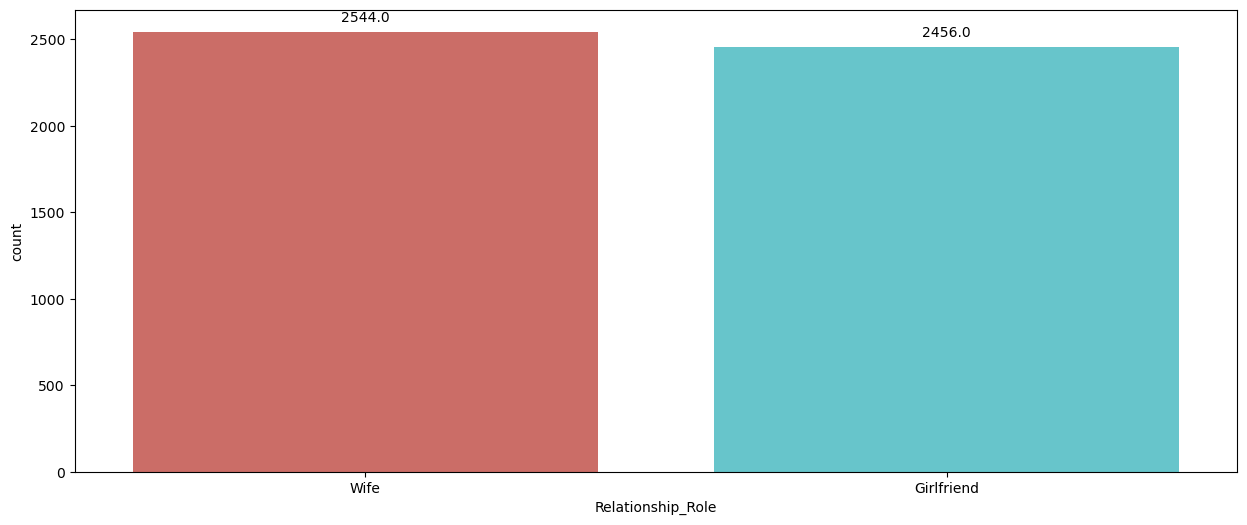

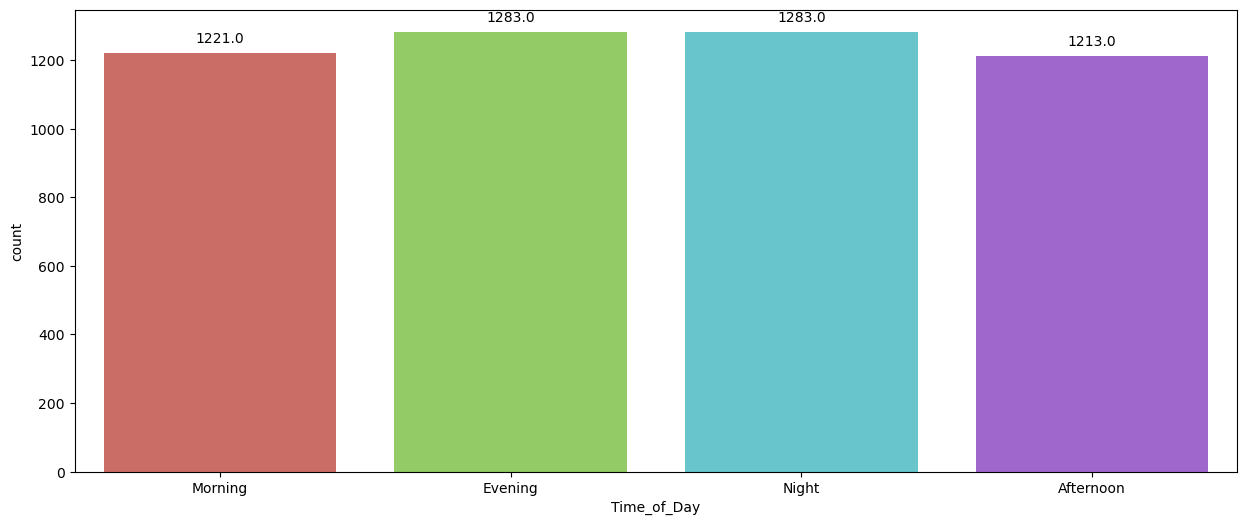

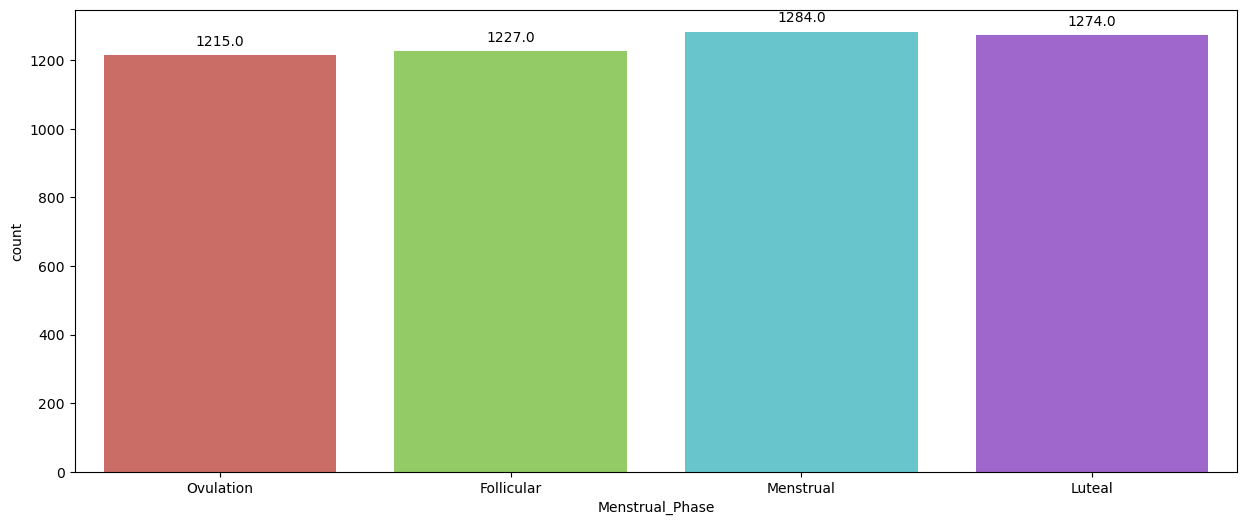

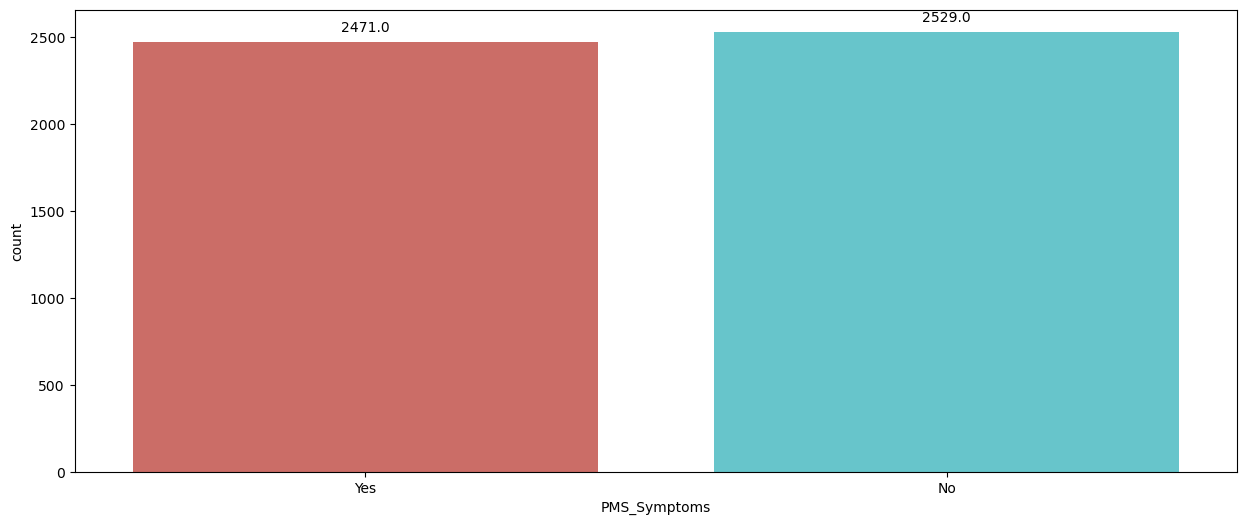

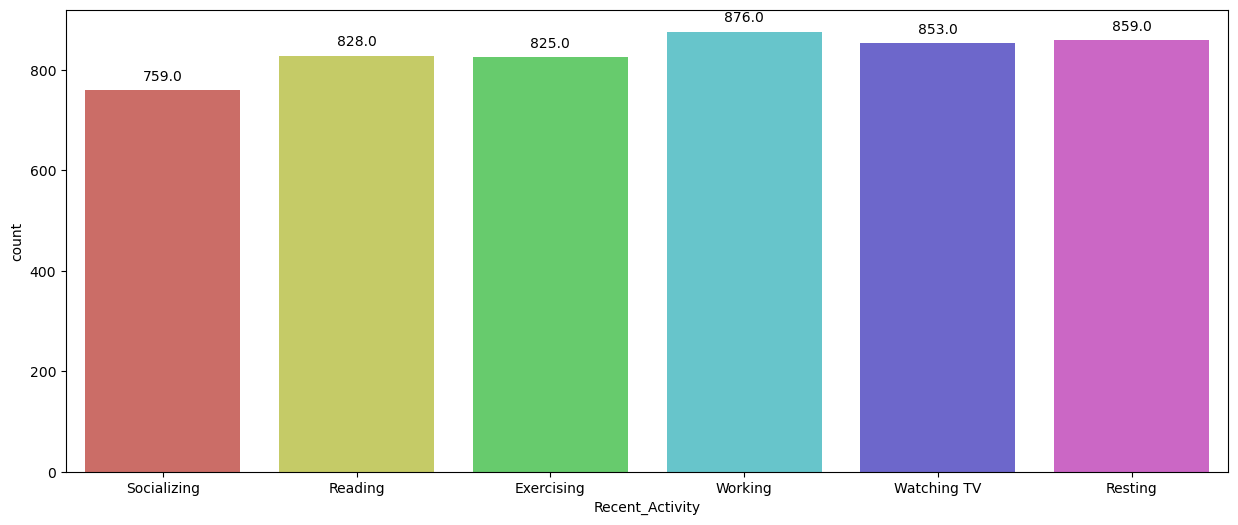

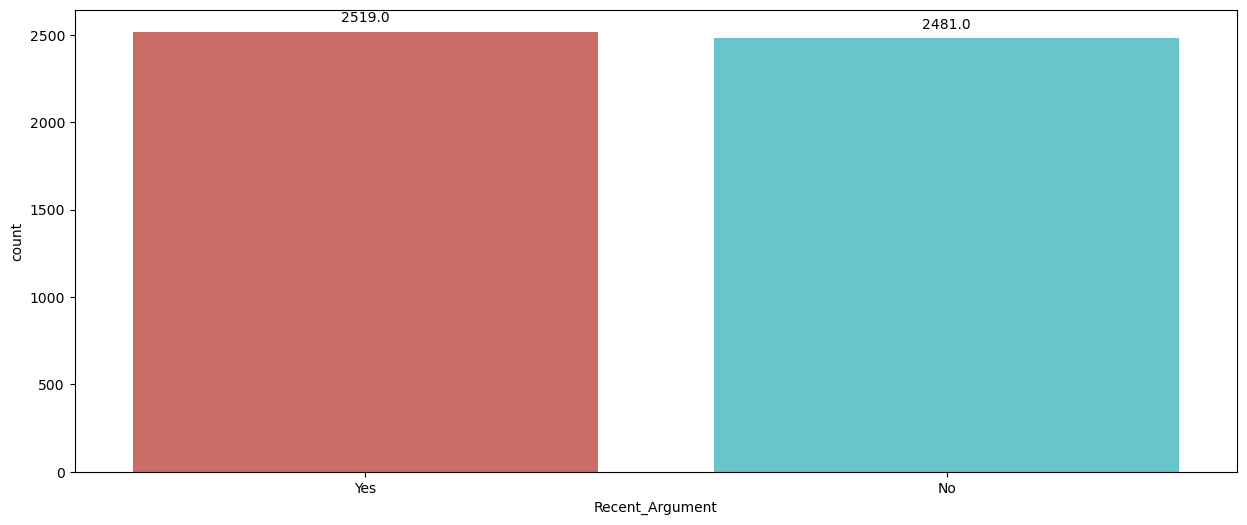

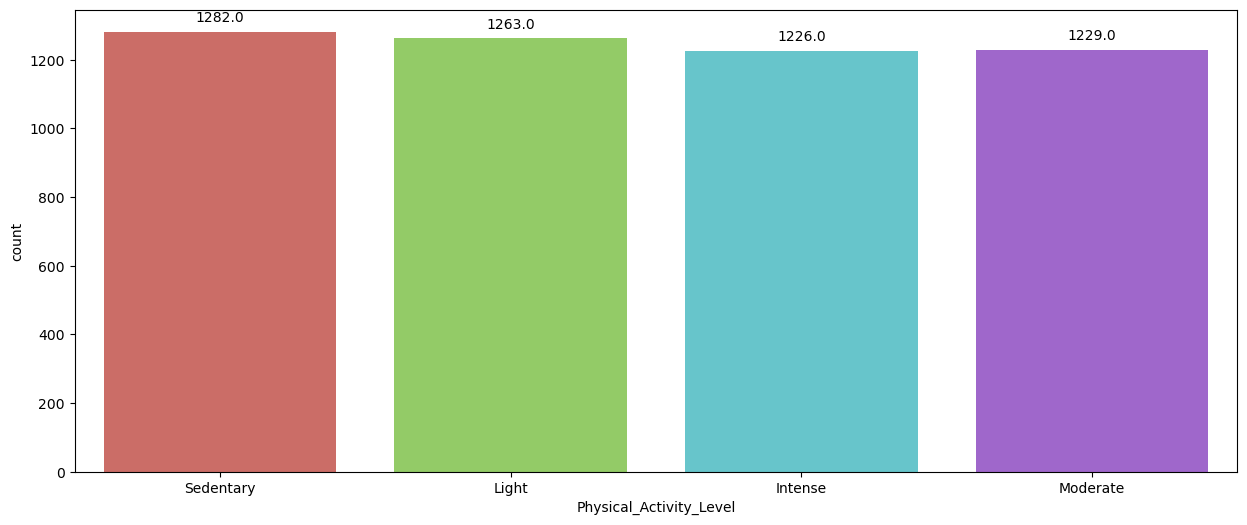

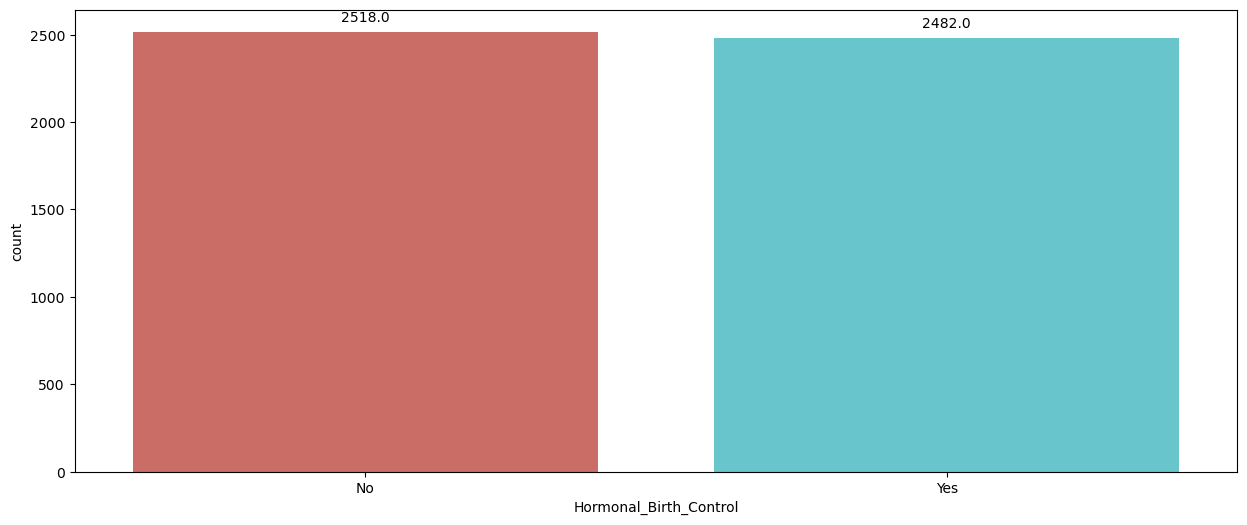

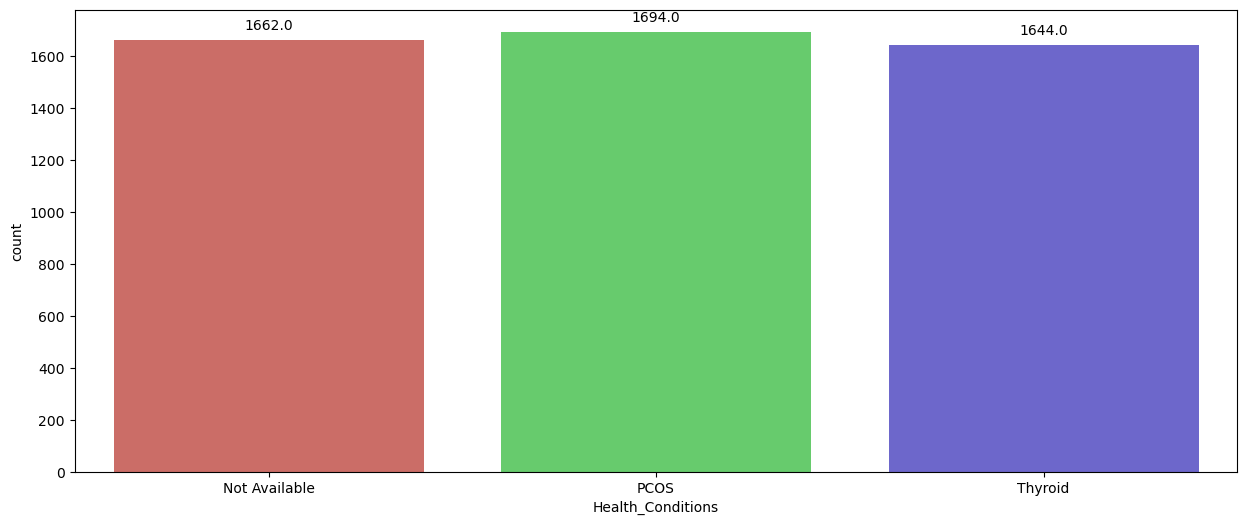

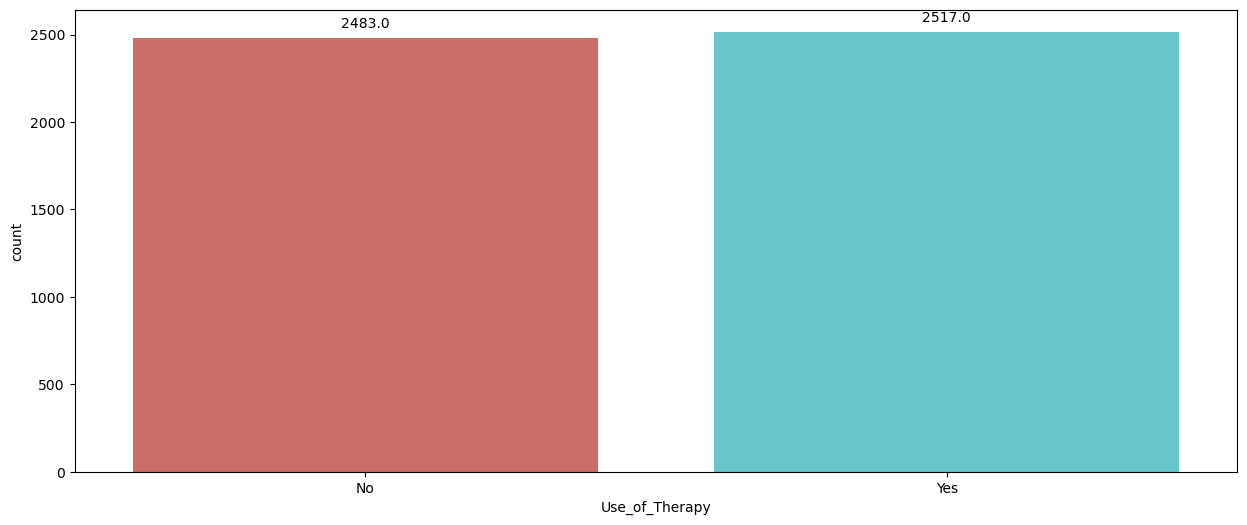

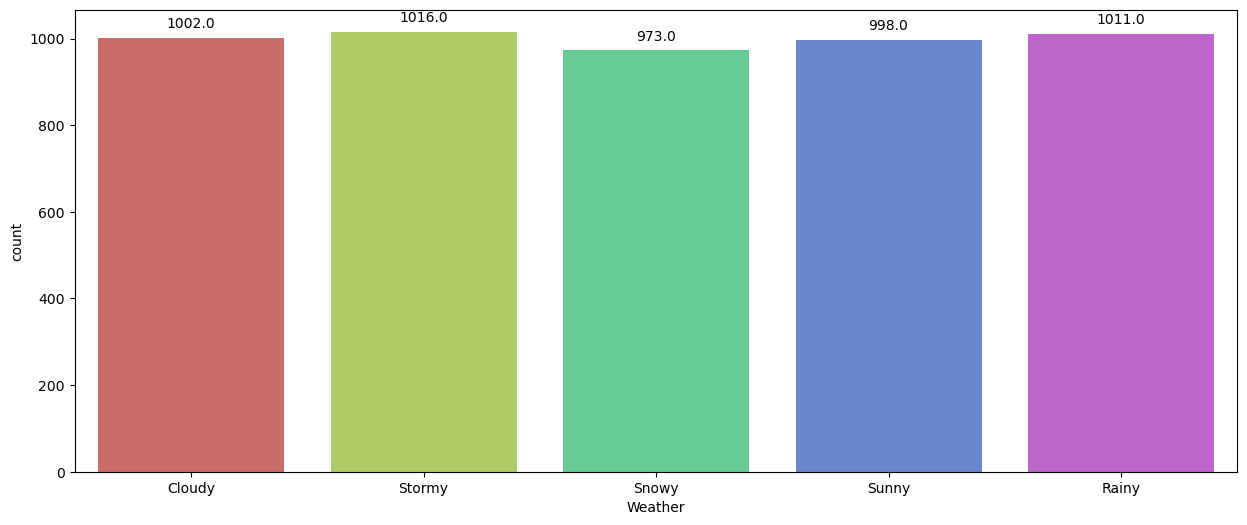

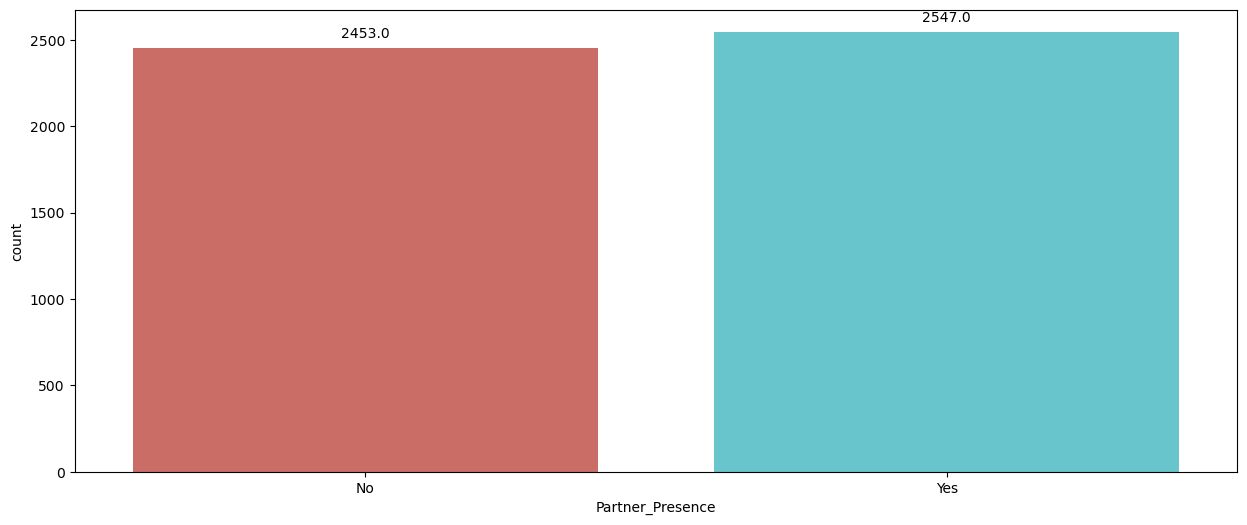

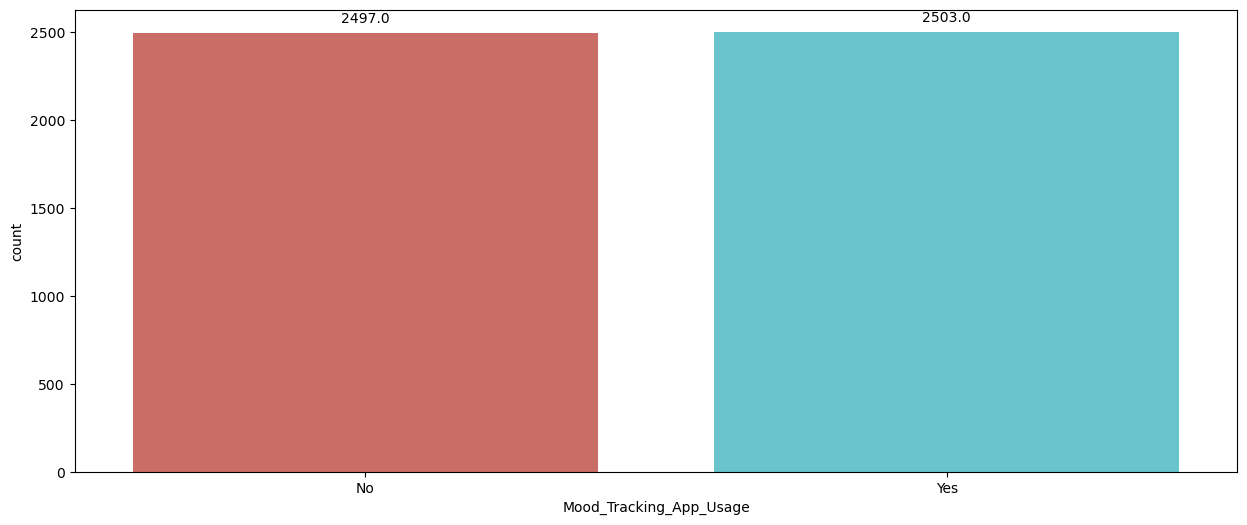

In [30]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

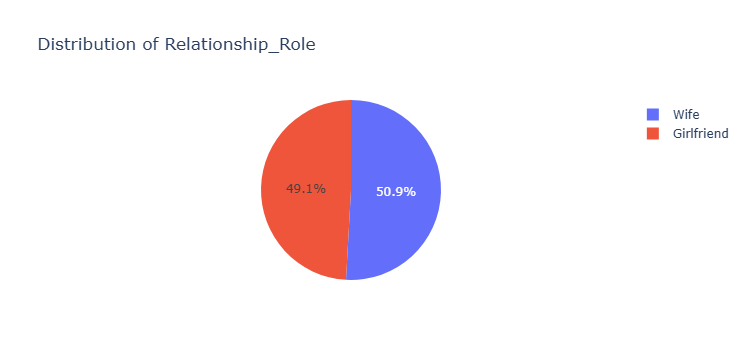

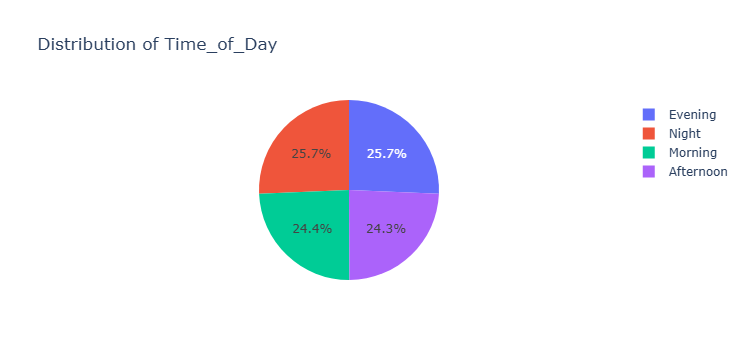

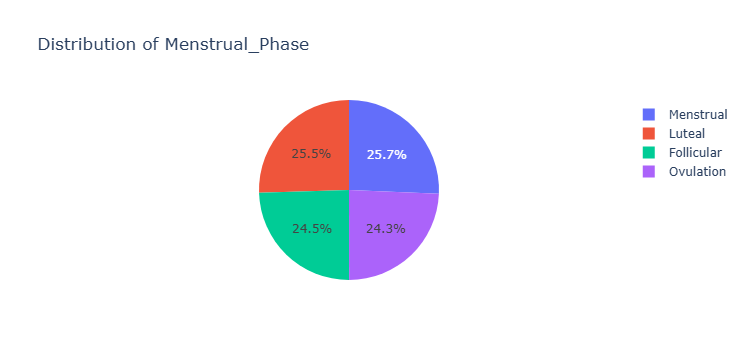

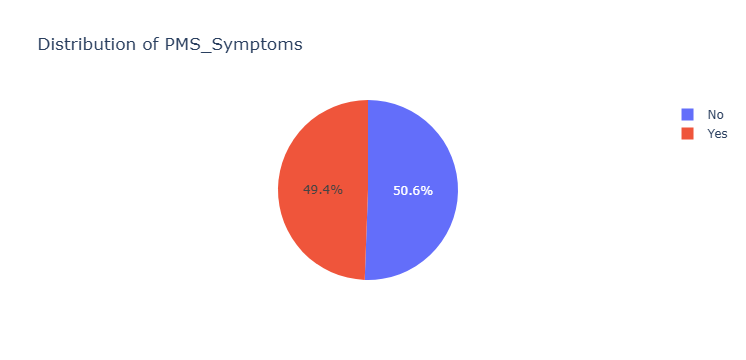

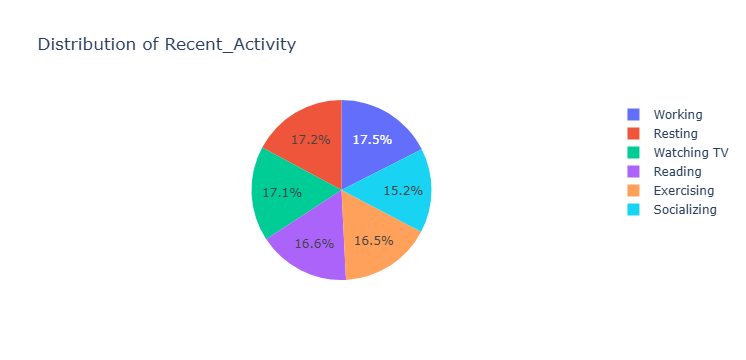

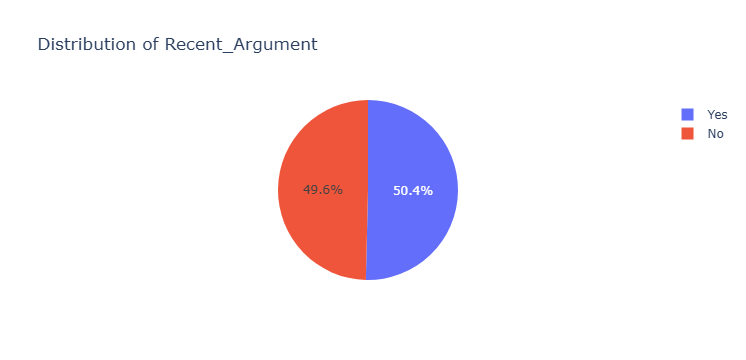

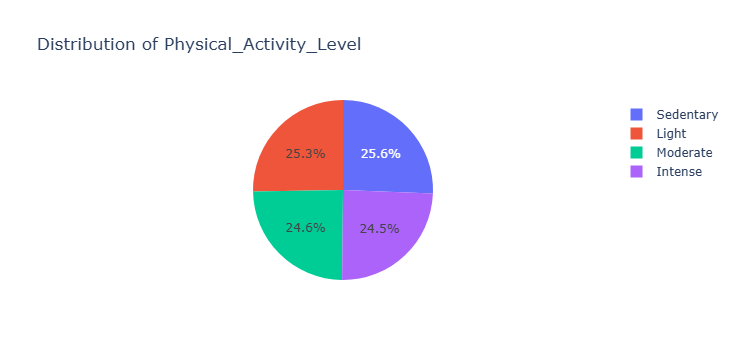

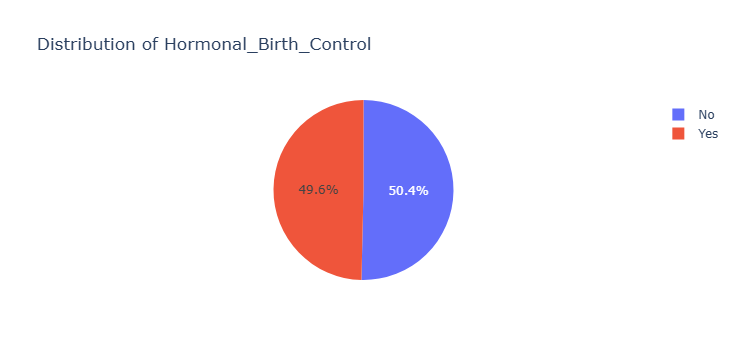

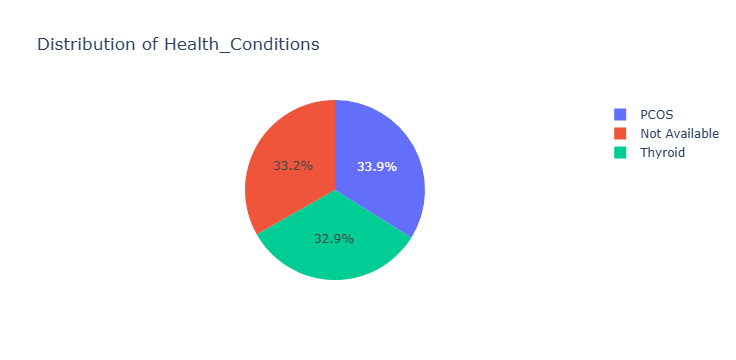

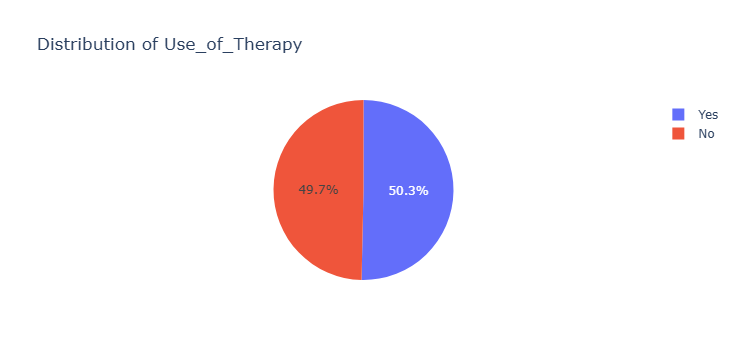

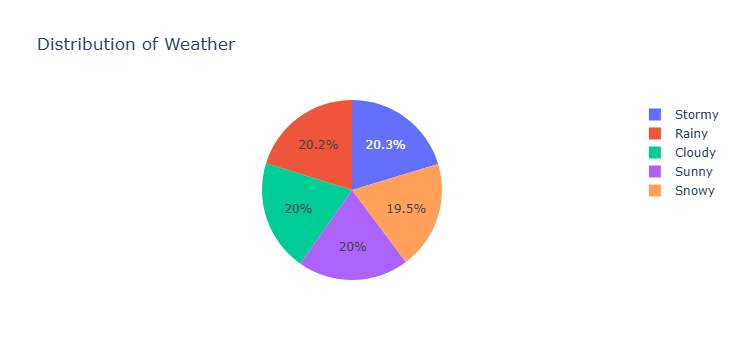

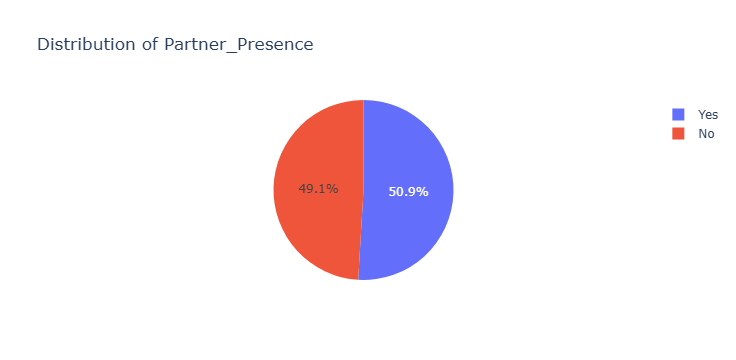

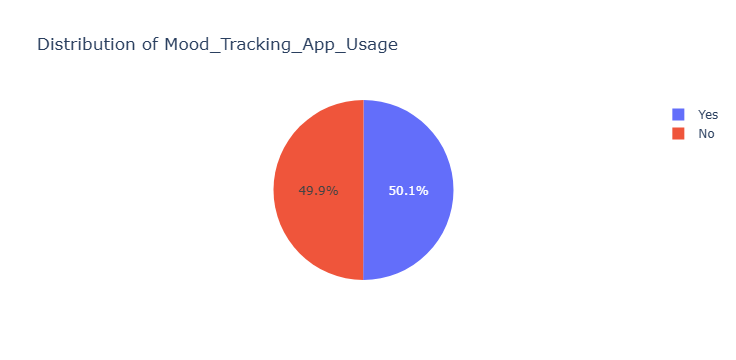

In [31]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

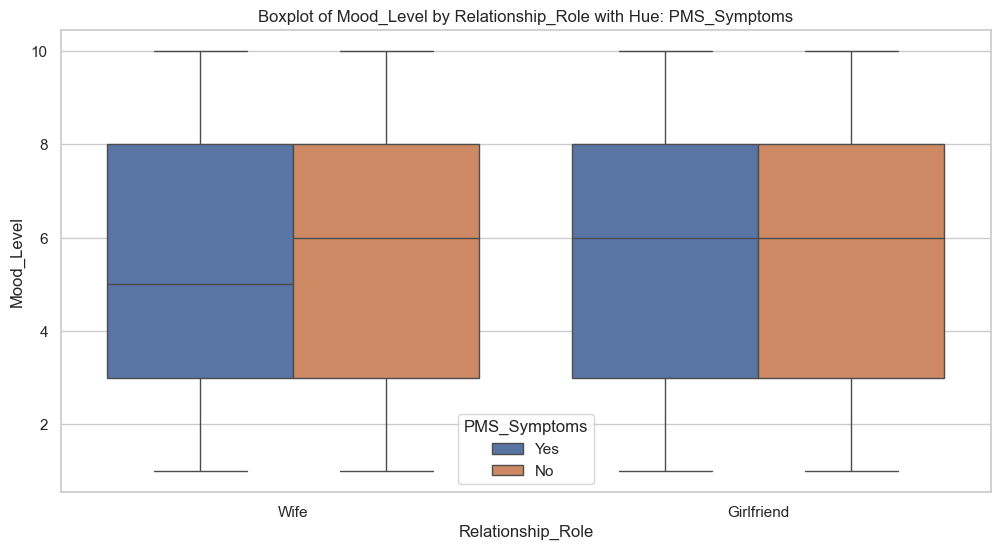

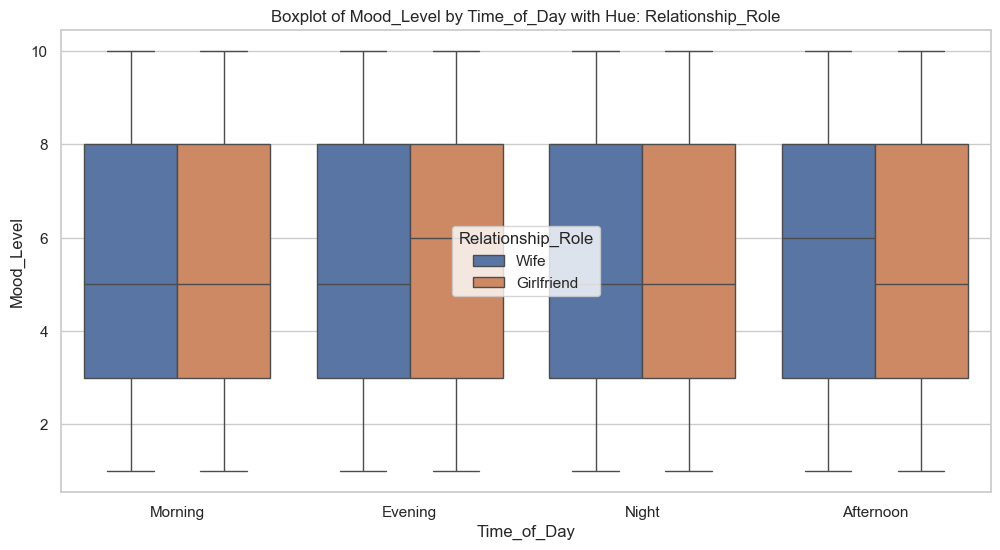

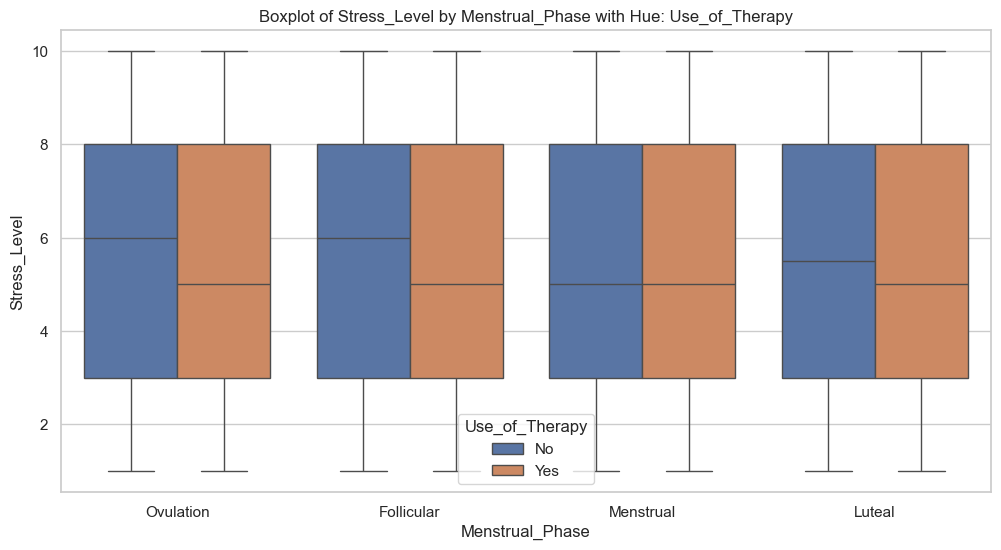

In [32]:
sns.set(style="whitegrid")

def boxplot_with_hue(x, y, hue):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, hue=hue, data=df)
    plt.title(f'Boxplot of {y} by {x} with Hue: {hue}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.show()

boxplot_with_hue('Relationship_Role', 'Mood_Level', 'PMS_Symptoms')

boxplot_with_hue('Time_of_Day', 'Mood_Level', 'Relationship_Role')

boxplot_with_hue('Menstrual_Phase', 'Stress_Level', 'Use_of_Therapy')

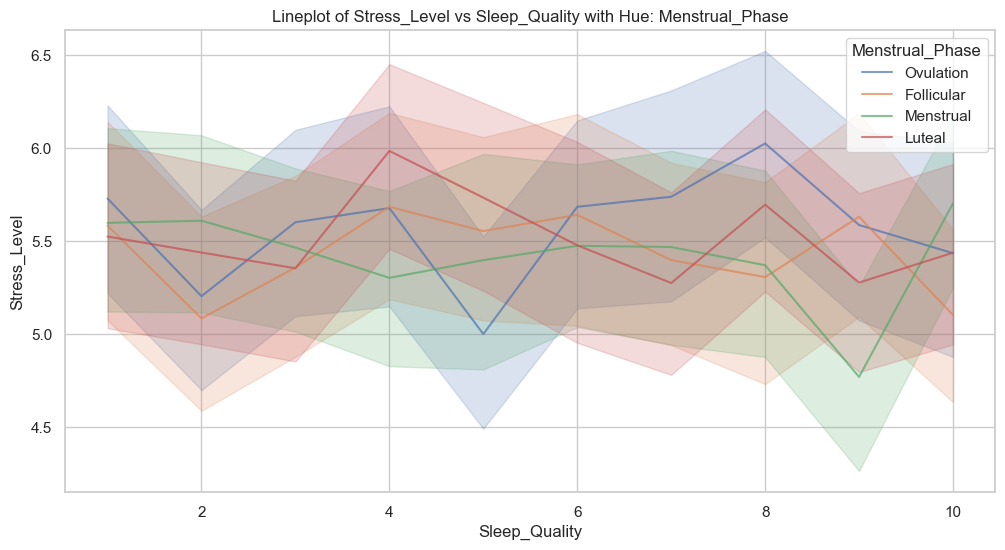

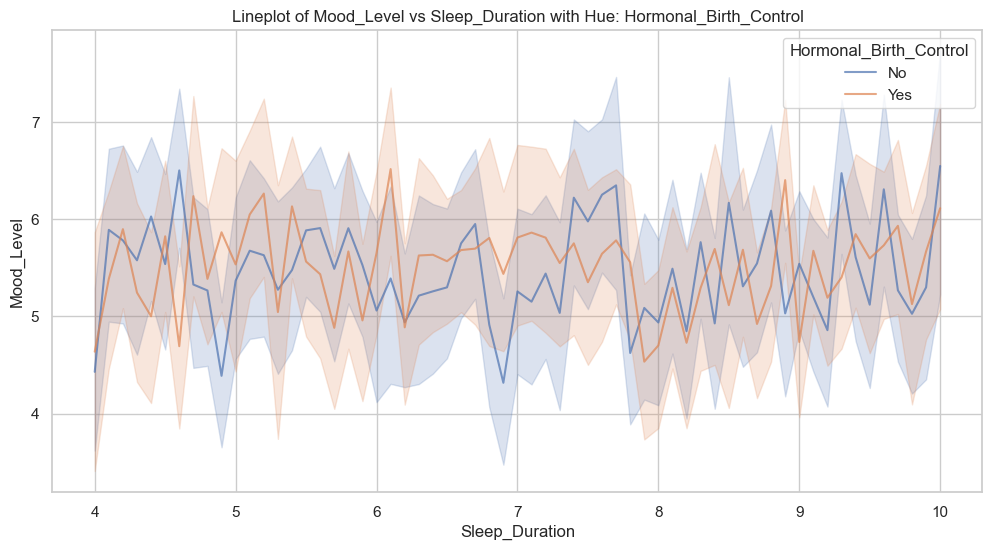

In [33]:
def lineplot_with_hue(x, y, hue):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=x, y=y, hue=hue, data=df, alpha=0.7)
    plt.title(f'Lineplot of {y} vs {x} with Hue: {hue}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.show()

lineplot_with_hue('Sleep_Quality', 'Stress_Level', 'Menstrual_Phase')

lineplot_with_hue('Sleep_Duration', 'Mood_Level', 'Hormonal_Birth_Control')

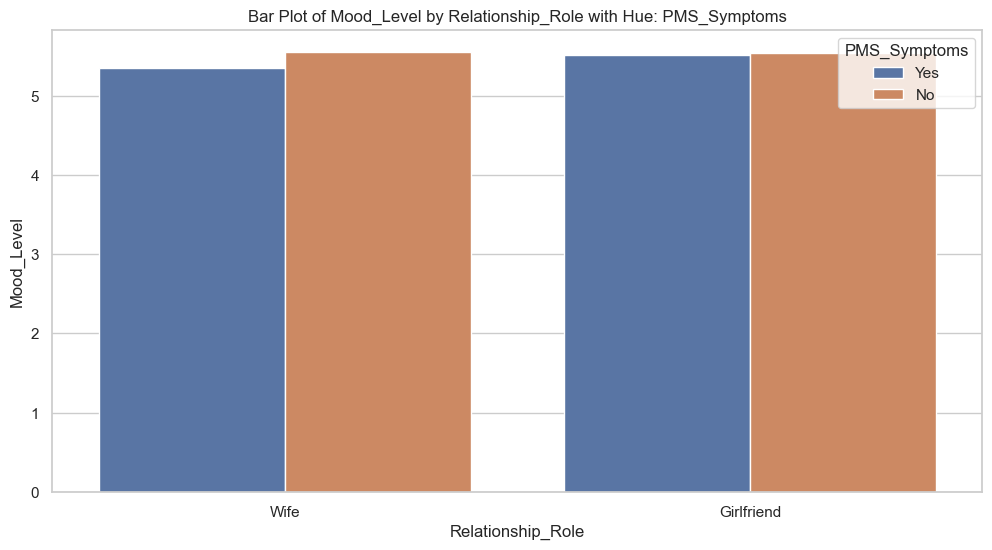

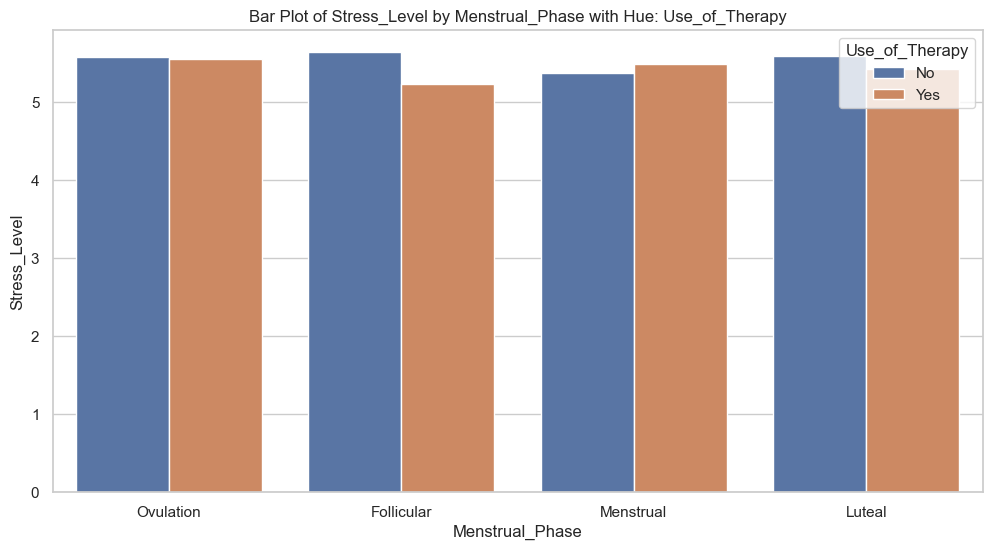

In [34]:
def barplot_with_hue(x, y, hue):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x, y=y, hue=hue, data=df, ci=None)
    plt.title(f'Bar Plot of {y} by {x} with Hue: {hue}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title=hue)
    plt.show()

barplot_with_hue('Relationship_Role', 'Mood_Level', 'PMS_Symptoms')

barplot_with_hue('Menstrual_Phase', 'Stress_Level', 'Use_of_Therapy')

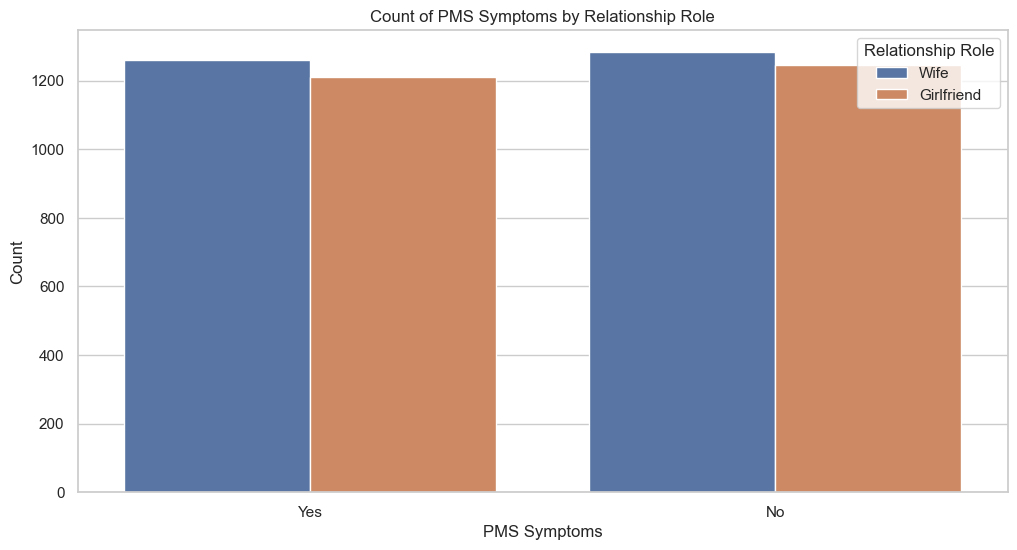

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PMS_Symptoms', hue='Relationship_Role', data=df)
plt.title('Count of PMS Symptoms by Relationship Role')
plt.xlabel('PMS Symptoms')
plt.ylabel('Count')
plt.legend(title='Relationship Role')
plt.show()

In [36]:
contingency_table = pd.crosstab(df['Use_of_Therapy'], df['Health_Conditions'])

print("Contingency Table for Use of Therapy and Health Conditions:\n", contingency_table)

Contingency Table for Use of Therapy and Health Conditions:
 Health_Conditions  Not Available  PCOS  Thyroid
Use_of_Therapy                                 
No                           818   804      861
Yes                          844   890      783


In [37]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic = {chi2}, p-value = {p}")

Chi-square statistic = 8.2426475745888, p-value = 0.0162230243873968


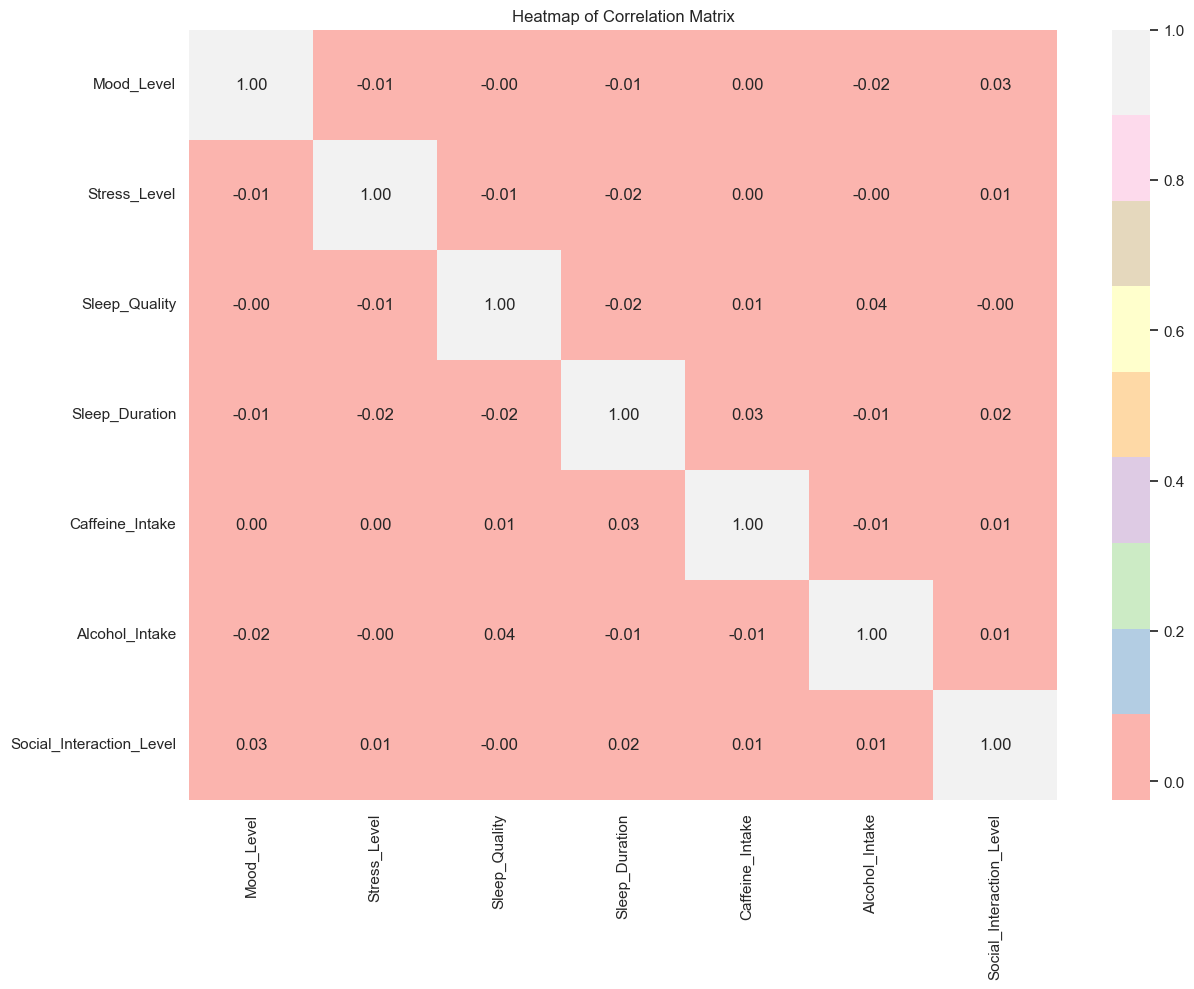

In [38]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[['Mood_Level', 'Stress_Level', 'Sleep_Quality', 'Sleep_Duration', 'Caffeine_Intake',
                         'Alcohol_Intake', 'Social_Interaction_Level']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

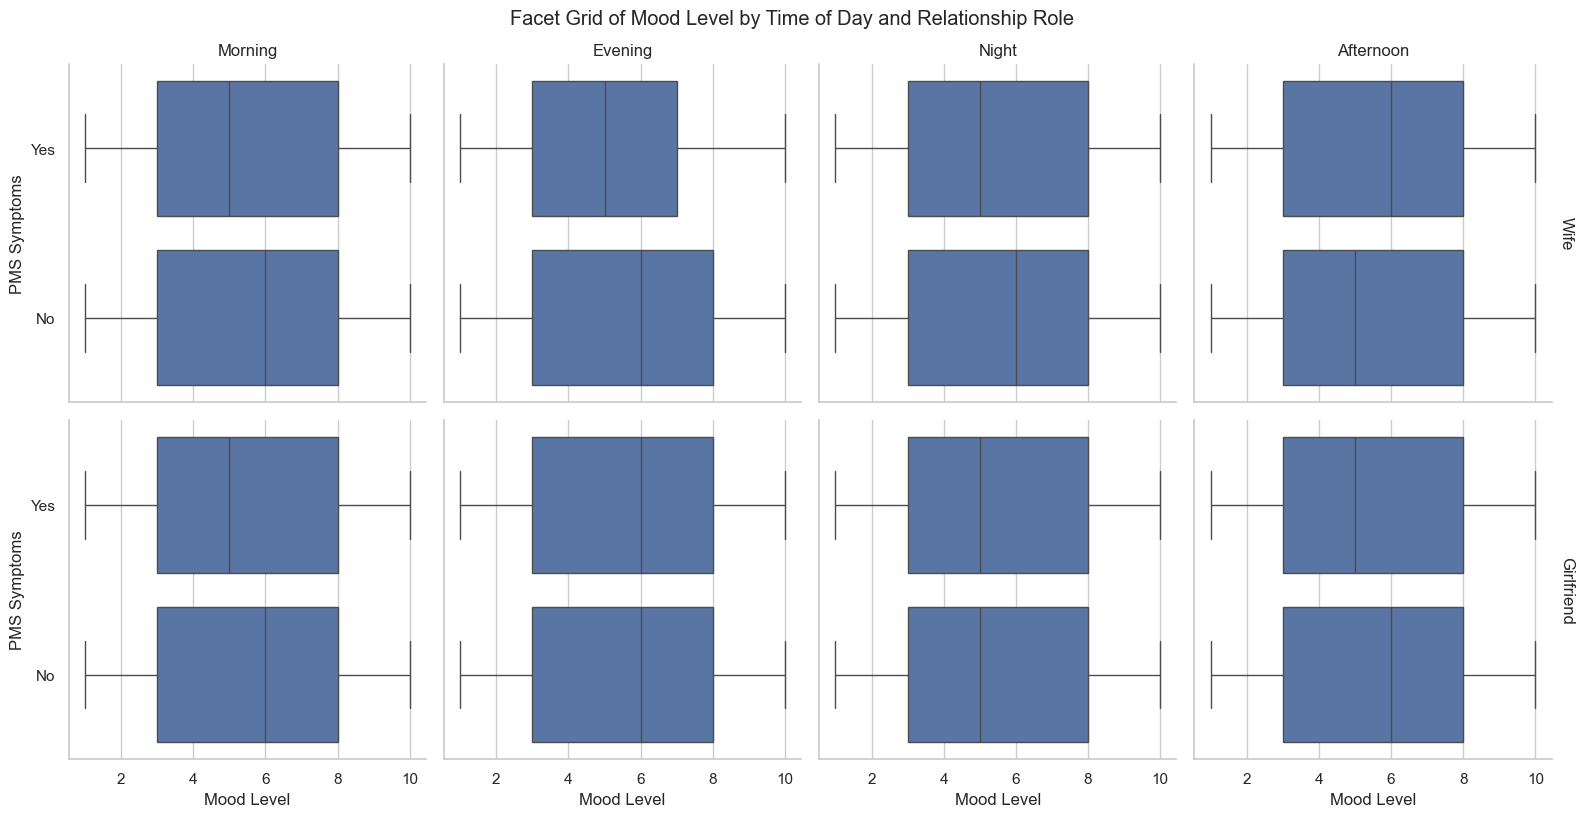

In [39]:
g = sns.FacetGrid(df, col='Time_of_Day', row='Relationship_Role', margin_titles=True, height=4)
g.map(sns.boxplot, 'Mood_Level', 'PMS_Symptoms')
g.set_axis_labels("Mood Level", "PMS Symptoms")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.suptitle('Facet Grid of Mood Level by Time of Day and Relationship Role', y=1.02)
plt.show()

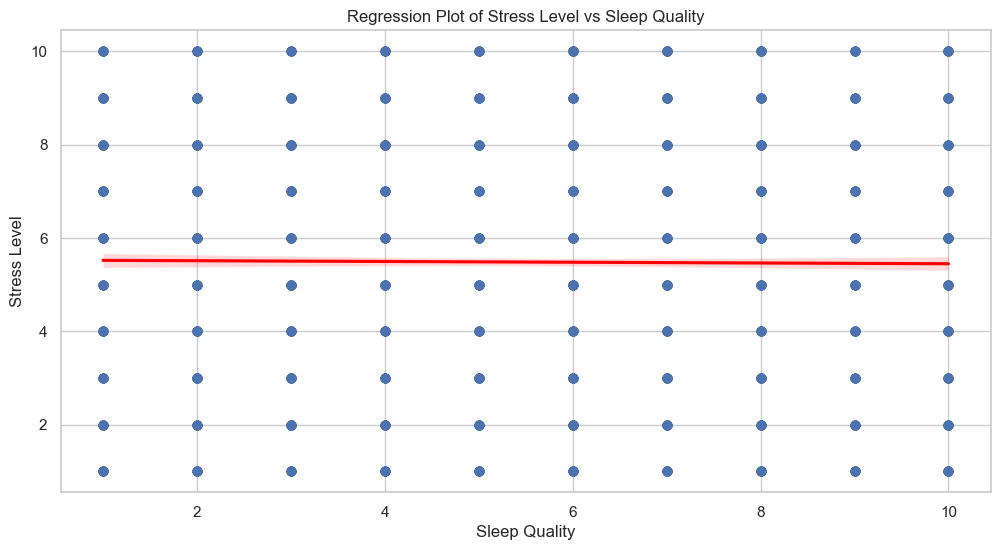

In [40]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Sleep_Quality', y='Stress_Level', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Regression Plot of Stress Level vs Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.show()

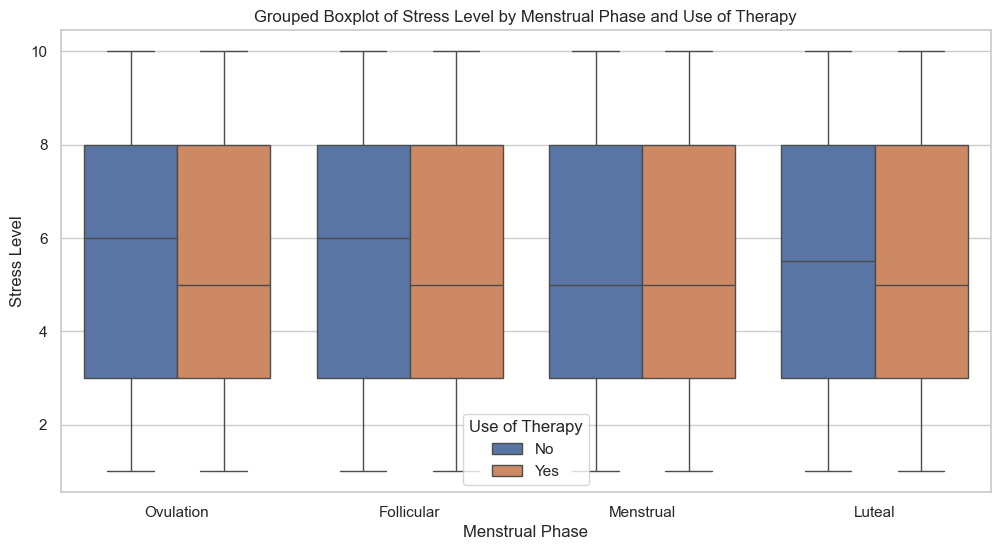

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Menstrual_Phase', y='Stress_Level', hue='Use_of_Therapy', data=df)
plt.title('Grouped Boxplot of Stress Level by Menstrual Phase and Use of Therapy')
plt.xlabel('Menstrual Phase')
plt.ylabel('Stress Level')
plt.legend(title='Use of Therapy')
plt.show()

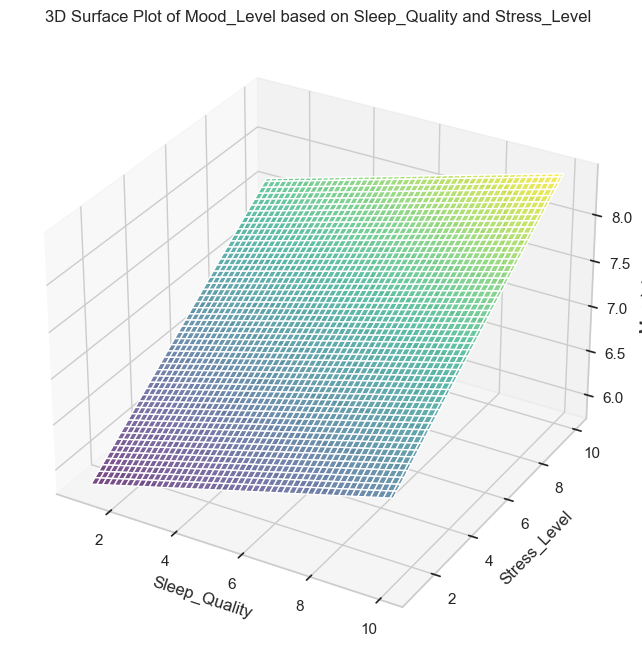

In [42]:
def plot_3d_surface(x, y, z):
    X = np.linspace(df[x].min(), df[x].max(), 100)
    Y = np.linspace(df[y].min(), df[y].max(), 100)
    X, Y = np.meshgrid(X, Y)

    Z = np.mean(df[z]) + (X * 0.1) + (Y * 0.2)  

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(f'3D Surface Plot of {z} based on {x} and {y}')

    plt.show()

plot_3d_surface('Sleep_Quality', 'Stress_Level', 'Mood_Level')

In [43]:
pivot_mood_relationship_time = df.pivot_table(
    values='Mood_Level', 
    index='Relationship_Role', 
    columns='Time_of_Day', 
    aggfunc='mean', 
    fill_value=0
)

print("Average Mood Level by Relationship Role and Time of Day:")
pivot_mood_relationship_time

Average Mood Level by Relationship Role and Time of Day:


Time_of_Day        Afternoon   Evening   Morning     Night
Relationship_Role                                         
Girlfriend          5.507200  5.742623  5.513468  5.344498
Wife                5.520408  5.371471  5.446571  5.472561

In [44]:
pivot_pms_count = df.pivot_table( 
    index='Menstrual_Phase', 
    columns='PMS_Symptoms', 
    aggfunc='count', 
    fill_value=0
)

print("\nCount of PMS Symptoms by Menstrual Phase:")
pivot_pms_count


Count of PMS Symptoms by Menstrual Phase:


Age      Alcohol_Intake      Caffeine_Intake       \
PMS_Symptoms      No  Yes             No  Yes              No  Yes   
Menstrual_Phase                                                      
Follicular       615  612            615  612             615  612   
Luteal           666  608            666  608             666  608   
Menstrual        641  643            641  643             641  643   
Ovulation        607  608            607  608             607  608   

                Conflict_Intensity      Diet_Quality       ... Temperature  \
PMS_Symptoms                    No  Yes           No  Yes  ...          No   
Menstrual_Phase                                            ...               
Follicular                     615  612          615  612  ...         615   
Luteal                         666  608          666  608  ...         666   
Menstrual                      641  643          641  643  ...         641   
Ovulation                      607  608          607  608  ...         607   

                     Time_of_Day      Use_of_Therapy      Weather       \
PMS_Symptoms     Yes          No  Yes             No  Yes      No  Yes   
Menstrual_Phase                                                          
Follicular       612         615  612            615  612     615  612   
Luteal           608         666  608            666  608     666  608   
Menstrual        643         641  643            641  643     641  643   
Ovulation        608         607  608            607  608     607  608   

                Weekly_Self_Care_Activities       
PMS_Symptoms                             No  Yes  
Menstrual_Phase                                   
Follicular                              615  612  
Luteal                                  666  608  
Menstrual                               641  643  
Ovulation                               607  608  

[4 rows x 60 columns]

In [45]:
pivot_stress_activity_hbc = df.pivot_table(
    values='Stress_Level', 
    index='Physical_Activity_Level', 
    columns='Hormonal_Birth_Control', 
    aggfunc='mean', 
    fill_value=0
)

print("\nAverage Stress Level based on Physical Activity Level and Hormonal Birth Control:")
pivot_stress_activity_hbc


Average Stress Level based on Physical Activity Level and Hormonal Birth Control:


Hormonal_Birth_Control         No       Yes
Physical_Activity_Level                    
Intense                  5.381180  5.479132
Light                    5.559375  5.382022
Moderate                 5.590323  5.586207
Sedentary                5.477021  5.400922

In [46]:
pivot_sleep_quality = df.pivot_table(
    values='Sleep_Quality', 
    index='Time_of_Day', 
    columns='Recent_Activity', 
    aggfunc='mean', 
    fill_value=0
)

print("\nAverage Sleep Quality by Time of Day and Recent Activity:")
pivot_sleep_quality


Average Sleep Quality by Time of Day and Recent Activity:


Recent_Activity  Exercising   Reading   Resting  Socializing  Watching TV  \
Time_of_Day                                                                 
Afternoon          5.320652  5.808511  5.258621     5.431694     5.482143   
Evening            5.566372  5.776699  5.778894     5.555556     5.507042   
Morning            5.427184  5.970000  5.004926     5.655738     5.245370   
Night              5.813397  5.645299  5.102222     5.102151     5.575000   

Recent_Activity   Working  
Time_of_Day                
Afternoon        5.435644  
Evening          5.340517  
Morning          5.239437  
Night            5.641921

In [47]:
pivot_alcohol_intake = df.pivot_table(
    values='Alcohol_Intake', 
    index='Menstrual_Phase', 
    aggfunc='sum', 
    fill_value=0
)

print("\nTotal Alcohol Intake by Menstrual Phase:")
pivot_alcohol_intake


Total Alcohol Intake by Menstrual Phase:


Alcohol_Intake
Menstrual_Phase                
Follicular                 5316
Luteal                     5693
Menstrual                  5694
Ovulation                  5563

In [48]:


X_reg = df[['Age', 'Stress_Level', 'Sleep_Quality', 'Diet_Quality']]  
X_reg = sm.add_constant(X_reg) 
model = sm.OLS(df['Mood_Level'], X_reg).fit()
print("\nRegression Analysis Summary:")
print(model.summary())


Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:             Mood_Level   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4977
Date:                Wed, 16 Oct 2024   Prob (F-statistic):              0.737
Time:                        22:45:56   Log-Likelihood:                -12338.
No. Observations:                5000   AIC:                         2.469e+04
Df Residuals:                    4995   BIC:                         2.472e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           

In [49]:
df = df.drop(['Participant_ID'], axis = 1)

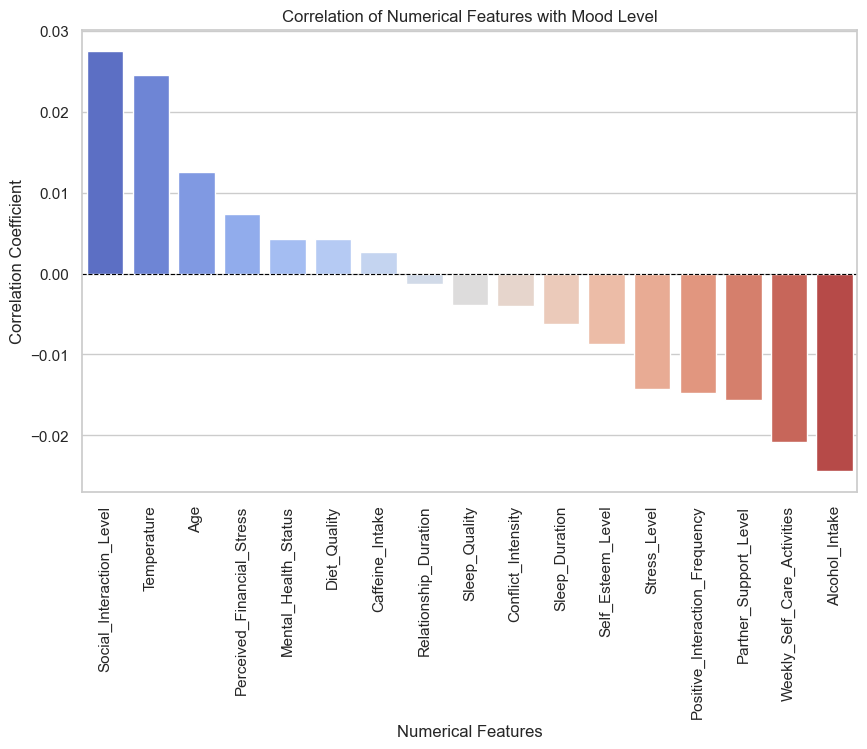

In [50]:
numerical_df = df.select_dtypes(include=[np.number])

correlation_with_target = numerical_df.corr()['Mood_Level'].drop('Mood_Level')

correlation_sorted = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_sorted.index, y=correlation_sorted.values, palette='coolwarm')
plt.title('Correlation of Numerical Features with Mood Level')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

In [51]:
correlation_sorted

Social_Interaction_Level          0.027553
Temperature                       0.024572
Age                               0.012562
Perceived_Financial_Stress        0.007309
Mental_Health_Status              0.004247
Diet_Quality                      0.004230
Caffeine_Intake                   0.002617
Relationship_Duration            -0.001332
Sleep_Quality                    -0.003942
Conflict_Intensity               -0.003963
Sleep_Duration                   -0.006298
Self_Esteem_Level                -0.008760
Stress_Level                     -0.014308
Positive_Interaction_Frequency   -0.014825
Partner_Support_Level            -0.015594
Weekly_Self_Care_Activities      -0.020878
Alcohol_Intake                   -0.024365
Name: Mood_Level, dtype: float64

In [52]:
wife_moods = df1[df1['Relationship_Role'] == 'Wife']['Mood_Level']
girlfriend_moods = df1[df1['Relationship_Role'] == 'Girlfriend']['Mood_Level']

t_stat, p_value = stats.ttest_ind(wife_moods.dropna(), girlfriend_moods.dropna(), equal_var=False)

print(f"T-statistic => {t_stat}, P-value => {p_value}")

alpha = 0.05

T-statistic => -0.9308825691062167, P-value => 0.35195934808573004


In [53]:
if p_value < alpha:
    print("There is a significant difference in mood swings between wife and girlfriend.")
else:
    print("No significant difference in mood swings between wife and girlfriend.")

No significant difference in mood swings between wife and girlfriend.
